# Telecom Churn Case Study

### Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an **average of 15-25% annual churn rate**. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, **telecom companies need to predict which customers are at high risk of churn.**

### Understanding Churn

There are two main models of payment in the telecom industry - **postpaid** and **Prepaid**. While in case of Postpaid customer informs operator to terminate services, in case of prepaid if a customer wants to switch to another network provider they can do so without any notice.

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and southeast Asia, while postpaid is more common in Europe in North America.

**This project is based on the Indian and Southeast Asian market.**

### Definitions of Churn

Churn can be broadly classified into two groups:
1. **Revenue-based churn:** Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time.
2. **Usage-based churn:** Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

**In this project, you will use the usage-based definition to define churn.**

### High Value Churn

In the Indian and the southeast Asian market, approximately 80% of revenue comes from the **top 20% customers** (called high-value customers).
In this project, you will define high-value customers based on a certain metric (mentioned later below) and **predict churn only on high-value customers.**

### Business Objective

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. Business wants to know whether a **high-value customer will churn or not**, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

Another objective is to **identify important predictor attributes** which help the business understand indicators of churn. It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

### Data

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively.

**Filename:** telecom_churn_data.csv

### 1. Import libraries

In [183]:
# Import the required library
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import datetime as dt

from scipy.stats import norm
from scipy import stats

import sklearn
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import plot_confusion_matrix

import sklearn.preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import precision_recall_curve

pd.set_option('display.max_columns',250)
pd.set_option('display.max_rows', None)

# Ignoring warning messages
import warnings
warnings.filterwarnings('ignore')

**Note:** pre-requisite for **plot_confusion_matrix is sklearn version 0.22**.

### 2. Data Understanding & Cleaning

In [184]:
# Load Data
telecom = pd.read_csv('telecom_churn_data.csv') 

In [185]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


Dataset has 226 columns and 99999 rows. Out of which 214 variables are of type int/float and 12 are of type object.

In [186]:
# Have a look at the data
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

It can be observed that there are some features which are not month specific, an rest are month specific with prefix or suffix as month identifier. Month specific features or KPIs are same across months.

Monthly KPIs can also be broadly classified as **1. Voice usage 2. Data usage**

In [188]:
# 220 month specific KPIs
telecom[[col for col in telecom.columns if col[-2:] in ['_6','_7','_8','_9'] 
         or col[0:3] in ['jun','jul','aug','sep'] ]].columns

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9',
       'onnet_mou_6', 'onnet_mou_7',
       ...
       'sachet_3g_8', 'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'fb_user_9', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=220)

In [189]:
# 6 non month specific feautres
telecom[[col for col in telecom.columns if col[-2:] not in ['_6','_7','_8','_9'] 
         and col[0:3] not in ['jun','jul','aug','sep'] ]].columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'aon'],
      dtype='object')

In [190]:
# Describe dataset
telecom.describe(percentiles=[0.1,0.25,0.5,0.75,0.90,0.95,0.99])

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

Below can be observed from the above results:
1. Some features have **only 1 unique value so no variance**, thus no information can be derived
2. Most of the variables have **outliers (top 1-5%)**, as significant diffierence in value can be seen **between 95th percentile and Max.**

In [191]:
# Identify variables having single unique value
unique_vars = pd.DataFrame(telecom.nunique()).reset_index().rename(columns = {'index': 'feature', 0: 'nunique'})
print(unique_vars[unique_vars['nunique'] == 1])

                  feature  nunique
1               circle_id        1
2          loc_og_t2o_mou        1
3          std_og_t2o_mou        1
4          loc_ic_t2o_mou        1
5    last_date_of_month_6        1
6    last_date_of_month_7        1
7    last_date_of_month_8        1
8    last_date_of_month_9        1
61       std_og_t2c_mou_6        1
62       std_og_t2c_mou_7        1
63       std_og_t2c_mou_8        1
64       std_og_t2c_mou_9        1
113      std_ic_t2o_mou_6        1
114      std_ic_t2o_mou_7        1
115      std_ic_t2o_mou_8        1
116      std_ic_t2o_mou_9        1


There are 13 variables in total with a single unique value. Now check if there is any NULL values present for these columns.

In [192]:
# Find number of NULL or missing values in the selected columns
telecom[list(unique_vars[unique_vars['nunique'] == 1].feature)].isnull().sum()

circle_id                  0
loc_og_t2o_mou          1018
std_og_t2o_mou          1018
loc_ic_t2o_mou          1018
last_date_of_month_6       0
last_date_of_month_7     601
last_date_of_month_8    1100
last_date_of_month_9    1659
std_og_t2c_mou_6        3937
std_og_t2c_mou_7        3859
std_og_t2c_mou_8        5378
std_og_t2c_mou_9        7745
std_ic_t2o_mou_6        3937
std_ic_t2o_mou_7        3859
std_ic_t2o_mou_8        5378
std_ic_t2o_mou_9        7745
dtype: int64

In [193]:
# Further check if the single unique value is meaningful or not
telecom[list(unique_vars[unique_vars['nunique'] == 1].feature)].describe()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9
count,99999.0,98981.0,98981.0,98981.0,96062.0,96140.0,94621.0,92254.0,96062.0,96140.0,94621.0,92254.0
mean,109.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,109.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,109.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,109.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,109.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,109.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**So it's evident from the above result is that these columns have only a single unique value which will not add any value to the analysis, hence dropping the features**

In [194]:
# Drop features
telecom.drop(list(unique_vars[unique_vars['nunique'] == 1].feature),axis=1,inplace=True)

In [195]:
telecom.shape

(99999, 210)

In [197]:
# Remaining Non month specific feautres
telecom[[col for col in telecom.columns if col[-2:] not in ['_6','_7','_8','_9'] 
         and col[0:3] not in ['jun','jul','aug','sep'] ]].columns

Index(['mobile_number', 'aon'], dtype='object')

In [198]:
# Check the mobile_number field for unique values
telecom.mobile_number.nunique()

99999

**Mobile Number column has all unique values , and will not add any values.**

In [199]:
# Drop mobile_number
telecom.drop('mobile_number',axis=1,inplace=True)

In [200]:
# Check the last non month specific column
telecom.aon.describe()

count    99999.000000
mean      1219.854749
std        954.733842
min        180.000000
25%        467.000000
50%        863.000000
75%       1807.500000
max       4337.000000
Name: aon, dtype: float64

**aon** or **Age on network** seems to be an important column, so lets keep it.

### 3. Handling Missing Values

In [201]:
# Look for NULL or missing values across all columns
df= pd.DataFrame(telecom.isnull().sum()/len(telecom)*100).reset_index().rename(columns = {'index': 'feature', 0: '%Missing Values'})

In [202]:
# Columns having more than 70% missing values
df.loc[(df['%Missing Values'] > 70)]

,feature,%Missing Values
140,date_of_last_rech_data_6,74.846748
141,date_of_last_rech_data_7,74.428744
142,date_of_last_rech_data_8,73.660737
143,date_of_last_rech_data_9,74.077741
144,total_rech_data_6,74.846748
145,total_rech_data_7,74.428744
146,total_rech_data_8,73.660737
147,total_rech_data_9,74.077741
148,max_rech_data_6,74.846748
149,max_rech_data_7,74.428744


There are 40 variables having missing values greater than 70%

In [203]:
cols = list(df.loc[(df['%Missing Values'] > 70)].feature)
telecom[telecom[cols].isnull().all(axis=1)][cols].head()

,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [204]:
df.loc[(df['%Missing Values'] > 70)].feature.str[0:-1].unique()

array(['date_of_last_rech_data_', 'total_rech_data_', 'max_rech_data_',
       'count_rech_2g_', 'count_rech_3g_', 'av_rech_amt_data_',
       'arpu_3g_', 'arpu_2g_', 'night_pck_user_', 'fb_user_'],
      dtype=object)

So it can be observed that all columns are NULL together for those having more than 70% missing values. Following features seems to be important for analysis, thus imputing those with 0.
'total_rech_data_', 'max_rech_data_', 'count_rech_2g_', 'count_rech_3g_', 'av_rech_amt_data_', 'arpu_3g_', 'arpu_2g_', 'night_pck_user_', 'fb_user_'

The 'date_of_last_rech_data_' columns missing value impute not done intentionally as they will be used for feature engineering later and will finally be dropped.

**Imputing all the missing values with 0**

In [205]:
# impute with 0
cols = list(df.loc[(df['%Missing Values'] > 70)].feature)
for i in cols:
    if i[0:4] != 'date':
        telecom[i].fillna(0.0,inplace=True)

In [206]:
# Missing vaues between 10 and 70% 
df.loc[(df['%Missing Values'] > 10) & (df['%Missing Values'] <= 70)]

,feature,%Missing Values


In [208]:
# Unique columns having missing values between 5 and 10%
df.loc[(df['%Missing Values'] > 5) & (df['%Missing Values'] <=10 )].feature.str[0:-2].unique()

array(['onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou',
       'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou',
       'loc_og_t2c_mou', 'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2m_mou',
       'std_og_t2f_mou', 'std_og_mou', 'isd_og_mou', 'spl_og_mou',
       'og_others', 'loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou',
       'loc_ic_mou', 'std_ic_t2t_mou', 'std_ic_t2m_mou', 'std_ic_t2f_mou',
       'std_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'ic_others'],
      dtype=object)

In [209]:
cols = list(df.loc[(df['%Missing Values'] > 5) & (df['%Missing Values'] <=10 )].feature)
telecom[telecom[cols].isnull().all(axis=1)][cols].shape

(4392, 54)

In [210]:
df.loc[(df['%Missing Values'] > 0) & (df['%Missing Values'] <=5 )].feature.str[0:-2].unique()

array(['onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou',
       'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou',
       'loc_og_t2c_mou', 'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2m_mou',
       'std_og_t2f_mou', 'std_og_mou', 'isd_og_mou', 'spl_og_mou',
       'og_others', 'loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou',
       'loc_ic_mou', 'std_ic_t2t_mou', 'std_ic_t2m_mou', 'std_ic_t2f_mou',
       'std_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'ic_others',
       'date_of_last_rech'], dtype=object)

In [29]:
cols = list(df.loc[(df['%Missing Values'] > 0) & (df['%Missing Values'] <= 5 )].feature)
telecom[telecom[cols].isnull().all(axis=1)][cols].shape

(73, 58)

So it can be observed that:
1. **No columns having missing values between 10 and 70%**
2. Columns having missing values under 10% can be classified into 2 parts further:
    **a. Between 5 and 10%**
    **b. Between 1 and 5%**
3. Features are mostly about minutes of usage data
    
    Both groups contain same attributes, but from different months. Columns **from month 8 and 9 are having Null values in the range of 5-10% whereas columns from month 6 and 7 are having null values between 1 and 5%.**
    
    **Let's impute all the missing values with 0.**

Date columns missing value impute not done intentionally as they will be used for feature engineering later and will finally be dropped.

In [211]:
# Impute missing values with 0 for the columns having missing values between 1 and 10%
cols = list(df.loc[(df['%Missing Values'] > 0) & (df['%Missing Values'] <= 10)].feature)
for i in cols:
    if i[0:4] != 'date':
            telecom[i].fillna(0,inplace=True)

In [212]:
# Kept Date columns missing values as it is intentionally
df = telecom.isnull().sum().reset_index(name='missing_cnt')
df.loc[df['missing_cnt']>0].sort_values('missing_cnt', ascending=False)

,index,missing_cnt
140,date_of_last_rech_data_6,74846
141,date_of_last_rech_data_7,74428
143,date_of_last_rech_data_9,74077
142,date_of_last_rech_data_8,73660
135,date_of_last_rech_9,4760
134,date_of_last_rech_8,3622
133,date_of_last_rech_7,1767
132,date_of_last_rech_6,1607


In [213]:
telecom.shape

(99999, 209)

### 4. Feature Engineering

Let's derive some useful features from the existing variables of good (6th, 7th) and action (8th) months

1. **total_data_usage_mb**: Total monthly data volume usage per customer per month

In [215]:
# Find out the Vol of Data usage columns 
cols=[i for i in telecom.columns if i[0:3]=='vol']
cols

['vol_2g_mb_6',
 'vol_2g_mb_7',
 'vol_2g_mb_8',
 'vol_2g_mb_9',
 'vol_3g_mb_6',
 'vol_3g_mb_7',
 'vol_3g_mb_8',
 'vol_3g_mb_9']

In [216]:
# Get the total data usage (in mb) per month
for i in range(6,9):
    telecom['total_data_usage_mb_'+str(i)]=telecom['vol_2g_mb_'+str(i)] + telecom['vol_3g_mb_'+str(i)]

In [217]:
# Find the variables which provides the avg values
cols=[i for i in telecom.columns if i[0:2]=='av']
cols

['av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

So it can be seen that average recharge amount for Data is only given.

2. **total_voice_calls_mou**: Total incoming and outgoing minutes of usage per customer per month

In [218]:
# Get total voice usage 
for i in range(6,9):
    telecom['total_voice_calls_mou_'+str(i)]=telecom['total_og_mou_'+str(i)] + telecom['total_ic_mou_'+str(i)]

In [219]:
# Check if total_rech_data_ is the sum of count_rech_2g_ and count_rech_3g_ or not
telecom[telecom['total_rech_data_9'] == telecom['count_rech_2g_9'] + telecom['count_rech_3g_9']].shape

(99999, 215)

From the above it can be seen that total_rech_data_ for a month is always same as the total of count_rech_2g_ and count_rech_3g_ for that month. So we will use 'total_rech_data_' as the total number of data recharge per month

3. **total_rech_amt_data**: Total data recharge amount per user per month

In [220]:
telecom.rename(columns = {'jun_vbc_3g':'vbc_3g_6'}, inplace = True)
telecom.rename(columns = {'jul_vbc_3g':'vbc_3g_7'}, inplace = True) 
telecom.rename(columns = {'aug_vbc_3g':'vbc_3g_8'}, inplace = True) 

In [221]:
# total data recharge per month
for i in range(6,9):
    telecom['total_rech_amt_data_'+str(i)] = telecom['total_rech_data_'+str(i)]*telecom['av_rech_amt_data_'+str(i)]

4. **total_monthly_rech**: Total amount of recharge (Calls+Data) per customer per month.

In [222]:
# total voice and data recharge per month
for i in range(6,9):
    telecom['total_monthly_rech_'+str(i)] = telecom['total_rech_amt_'+str(i)] + telecom['total_rech_amt_data_'+str(i)]

5. **av_rech_amt_voice**: Average voice calls recharge per customer per month

In [223]:
# Avg voice recharge per month
for i in range(6,9):
    telecom['av_rech_amt_voice_'+str(i)] = telecom['total_rech_amt_'+str(i)]/telecom['total_rech_num_'+str(i)]

In [224]:
# Fill the NaN values with 0
telecom['av_rech_amt_voice_6'].fillna(0,inplace=True)
telecom['av_rech_amt_voice_7'].fillna(0,inplace=True)
telecom['av_rech_amt_voice_8'].fillna(0,inplace=True)

telecom['av_rech_amt_voice_6'].replace([np.inf, -np.inf], 0, inplace=True)
telecom['av_rech_amt_voice_7'].replace([np.inf, -np.inf], 0, inplace=True)
telecom['av_rech_amt_voice_8'].replace([np.inf, -np.inf], 0, inplace=True)


6. **total_roam_mou**: Total roaming minutes of usage per user per month.

In [225]:
# Get total roaming minutes of usage
for i in range(6,9):
    telecom['total_roam_mou_'+str(i)] = telecom['roam_ic_mou_'+str(i)] + telecom['roam_og_mou_'+str(i)]

7. **onnet_offnet_ratio**: Ratio of onnet (within T network) usage  and offnet (outside T network).

In [226]:
# Get the ratio of onnet and offnet
for i in range(6,9):
    telecom['onnet_offnet_ratio_'+str(i)] = telecom['onnet_mou_'+str(i)] / telecom['offnet_mou_'+str(i)]

In [227]:
# Fill the NaN values with 0
telecom['onnet_offnet_ratio_6'].fillna(0,inplace=True)
telecom['onnet_offnet_ratio_7'].fillna(0,inplace=True)
telecom['onnet_offnet_ratio_8'].fillna(0,inplace=True)

telecom['onnet_offnet_ratio_6'].replace([np.inf, -np.inf], 0, inplace=True)
telecom['onnet_offnet_ratio_7'].replace([np.inf, -np.inf], 0, inplace=True)
telecom['onnet_offnet_ratio_8'].replace([np.inf, -np.inf], 0, inplace=True)


8. **loc_og_ic**: Ratio of Outgoing and Incoming Local calls

In [228]:
# Get the ratio of local outgoing by incoming
for i in range(6,9):
    telecom['loc_og_ic_'+str(i)] = round(telecom['loc_og_mou_'+str(i)] / telecom['loc_ic_mou_'+str(i)],2)

In [229]:
# Fill the NaN values with 0
telecom['loc_og_ic_6'].fillna(0,inplace=True)
telecom['loc_og_ic_7'].fillna(0,inplace=True)
telecom['loc_og_ic_8'].fillna(0,inplace=True)

telecom['loc_og_ic_6'].replace([np.inf, -np.inf], 0, inplace=True)
telecom['loc_og_ic_7'].replace([np.inf, -np.inf], 0, inplace=True)
telecom['loc_og_ic_8'].replace([np.inf, -np.inf], 0, inplace=True)


9. **total_og_ic**: Ratio of total outgoing and incoming voice calls minutes of usage.

In [230]:
# Get the ratio of total outgoing and incoming mou
for i in range(6,9):
    telecom['total_og_ic_'+str(i)] = round(telecom['total_og_mou_'+str(i)] / telecom['total_ic_mou_'+str(i)],2)

In [231]:
# Fill the NaN values with 0
telecom['total_og_ic_6'].fillna(0,inplace=True)
telecom['total_og_ic_7'].fillna(0,inplace=True)
telecom['total_og_ic_8'].fillna(0,inplace=True)

telecom['total_og_ic_6'].replace([np.inf, -np.inf], 0, inplace=True)
telecom['total_og_ic_7'].replace([np.inf, -np.inf], 0, inplace=True)
telecom['total_og_ic_8'].replace([np.inf, -np.inf], 0, inplace=True)


10. **arpu_data**: Total arpu (3g + 2g) per user per month.

In [232]:
# Get the ratio of total 3g and 2g arpu per user per month
for i in range(6,9):
    telecom['arpu_data_'+str(i)] = telecom['arpu_3g_'+str(i)] + telecom['arpu_2g_'+str(i)]

11: **arpu_data_total_ratio**: Ratio of data vs total arpu ratio.

In [233]:
# Get the ratio of total outgoing and incoming mou
for i in range(6,9):
    telecom['arpu_data_total_ratio_'+str(i)] = round(telecom['arpu_data_'+str(i)] / telecom['arpu_'+str(i)],2)

In [234]:
# Fill the NaN values with 0
telecom['arpu_data_total_ratio_6'].fillna(0,inplace=True)
telecom['arpu_data_total_ratio_7'].fillna(0,inplace=True)
telecom['arpu_data_total_ratio_8'].fillna(0,inplace=True)

telecom['arpu_data_total_ratio_6'].replace([np.inf, -np.inf], 0, inplace=True)
telecom['arpu_data_total_ratio_7'].replace([np.inf, -np.inf], 0, inplace=True)
telecom['arpu_data_total_ratio_8'].replace([np.inf, -np.inf], 0, inplace=True)


12, **total_rech_amt_ratio**: Ratio of total data recharge and total voice calls rech

In [235]:
# Get the ratio of total outgoing and incoming mou
for i in range(6,9):
    telecom['total_rech_amt_ratio_'+str(i)] = round(telecom['total_rech_amt_data_'+str(i)] / telecom['total_rech_amt_'+str(i)],2)

In [236]:
# Fill the NaN values with 0
telecom['total_rech_amt_ratio_6'].fillna(0,inplace=True)
telecom['total_rech_amt_ratio_7'].fillna(0,inplace=True)
telecom['total_rech_amt_ratio_8'].fillna(0,inplace=True)

telecom['total_rech_amt_ratio_6'].replace([np.inf, -np.inf], 0, inplace=True)
telecom['total_rech_amt_ratio_7'].replace([np.inf, -np.inf], 0, inplace=True)
telecom['total_rech_amt_ratio_8'].replace([np.inf, -np.inf], 0, inplace=True)


13. **Date Columns**: Extract the recency of Last recharge from the Date columns

In [237]:
# Convert date columns to date format
date_cols=[i for i in telecom.columns if i[:4]=='date']
date_cols
for col in date_cols:
    telecom[col] = pd.to_datetime(telecom[col], format='%m/%d/%Y')

In [238]:
cols = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
# get the recent date of recharge in the last 3 months
telecom['last_rech_date'] = telecom[cols].max(axis=1)
# get the number of days from the recent recharge date till the last date of august month
telecom['days_since_last_rech'] = np.floor(( pd.to_datetime('2014-08-31', format='%Y-%m-%d') - telecom['last_rech_date'] ).astype('timedelta64[D]'))
# fill the null values as 0
telecom['days_since_last_rech'] = telecom['days_since_last_rech'].fillna(0)
telecom.drop(['last_rech_date','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'], axis=1, inplace=True)


cols = ['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']
# get the recent date of recharge data in the last 3 months
telecom['last_rech_data_date'] = telecom[cols].max(axis=1)
# get the number of days from the recent recharge data date till the last date of august month
telecom['days_since_last_data_rech'] = np.floor(( pd.to_datetime('2014-08-31', format='%Y-%m-%d') - telecom['last_rech_data_date'] ).astype('timedelta64[D]'))
# fill the null values as 0
telecom['days_since_last_data_rech'] = telecom['days_since_last_data_rech'].fillna(0)
telecom.drop(['last_rech_data_date','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'], axis=1, inplace=True)

14. **Ratio between Action and Good month**:
    Derive the ratio between Action and Good month to understand the change in revenue, usage and recharge amounts
    1. arpu_action_to_good_ratio
    2. total_rech_amt_action_to_good_ratio
    3. total_rech_amt_data_action_to_good_ratio
    4. total_data_usage_mb_action_to_good_ratio
    5. total_voice_calls_mou_action_to_good_ratio
    6. onnet_action_to_good_ratio
    7. offnet_action_to_good_ratio

In [239]:
cols=[
'arpu_', 
'total_rech_amt_',
'total_rech_amt_data_',
'total_data_usage_mb_',
'total_voice_calls_mou_',
'onnet_mou_',
'offnet_mou_',
'total_ic_mou_',
'total_og_mou_',
'total_roam_mou_'
]

for i in cols:
    telecom[i+'action_to_good_ratio'] = telecom[i+'8']/(telecom[[i+'6',i+'7']].mean(axis=1))
    telecom[i+'action_to_good_ratio'].fillna(0,inplace=True)
    telecom[i+'action_to_good_ratio'].replace([np.inf, -np.inf], 0, inplace=True)

In [240]:
telecom.shape

(99999, 251)

### 5. Filter for High-value customers:

Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [241]:
# Get the avegare of first two months (good phase) total monthly recharge amount
av_rech_good_Phase = round((telecom.total_monthly_rech_6 + telecom.total_monthly_rech_7)/2,2)

In [242]:
# Get the cutoff which is the 70th percentile of the good phase average recharge amounts
cutoff= np.percentile(av_rech_good_Phase,70)

In [243]:
# Get the customers with good phase avg. recharge amount >= to the cutoff of 70th percentile
telecom = telecom[av_rech_good_Phase >=  cutoff]
telecom.reset_index(inplace=True,drop=True)

In [244]:
telecom.shape

(30001, 251)

So 30K high value customers have been selected from the total dataset of approx. 100K customers.

### 6. Tag Churned customers

Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

1. total_ic_mou_9

2. total_og_mou_9

3. vol_2g_mb_9

4. vol_3g_mb_9

In [245]:
tag_churn_cols = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']
telecom['churn_flag'] = np.where(telecom[tag_churn_cols].sum(axis=1) == 0, 1, 0 )

In [246]:
telecom.groupby('churn_flag')['churn_flag'].count()

churn_flag
0    27560
1     2441
Name: churn_flag, dtype: int64

**2441 customers** out of 30K have been marked as 'Churned' customer based on 9th month data.

In [248]:
telecom.shape

(30001, 252)

As the next step, we will **drop all the attributes corresponds to Month 9 or September**

In [249]:
cols=list(telecom[[col for col in telecom.columns if col[-2:] in ['_9'] 
         or col[0:3] in ['sep'] ]].columns)

In [250]:
telecom.drop(cols,axis=1,inplace=True)

In [251]:
telecom.shape

(30001, 200)

In [252]:
# Check for missing value columns
df = telecom.isnull().sum().reset_index(name='missing_cnt')
df.loc[df['missing_cnt']>0].sort_values('missing_cnt', ascending=False)

,index,missing_cnt


### 7. Exploratory Data Analysis

Text(0.5, 0, 'churn_flag')

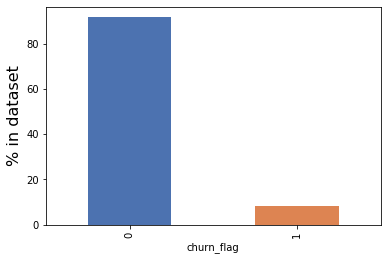

In [253]:
# Plot Churn vs Non churn distribution
values = (telecom['churn_flag'].value_counts(normalize=True)*100)
ax = values.plot.bar(color=sns.color_palette('deep', 16))
ax.set_ylabel('% in dataset', fontsize=16)
ax.set_xlabel('churn_flag', fontsize=10)

In [254]:
telecom.groupby('churn_flag')['churn_flag'].count()/len(telecom)*100

churn_flag
0    91.863605
1     8.136395
Name: churn_flag, dtype: float64

From the above it can be observed that there are **only 8.14% churn cases** available. Hence this is a **highly imbalanced dataset** as the churned customer is 8.14% which is **very low in compared to the non-churned customers i.e. 91.86%**.

#### Age on Network

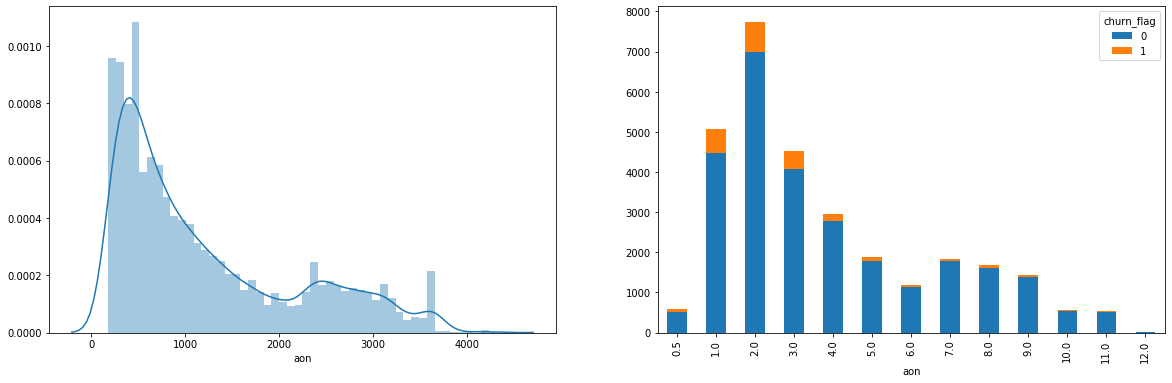

In [255]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20, 6))

sns.distplot(telecom['aon'], ax=ax1)

bins = [0, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
labels = [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

pd.crosstab(pd.cut(round(((telecom['aon']/30)/12),1), bins = bins, labels = labels ), telecom['churn_flag']).plot(kind='bar', stacked=True, ax = ax2)

**Observation:**
    1. Age on Network distribution is Right Skewed. Majority of the high value customers are falling within 0-5 years range.
    2. Most of the churned customers are having age on network between 1-3 years

In [256]:
# Create Function for Box plots
def box_plot(data, cols, title):
    plt.figure(figsize=(18, 5))
    for i in range(0,3):
        plt.subplot(1,3,i+1)
        X = pd.concat([data[cols[i]], data['churn_flag']], axis=1)
        X = pd.melt(X,id_vars="churn_flag",var_name="features",value_name='value')
        sns.boxplot(x="features", y="value", hue="churn_flag", data=X)
        plt.xticks(rotation=90)    
        plt.suptitle(title)

In [257]:
# Create Function for dist plots
def dist_plot(data, cols, title):
    plt.figure(figsize=(18, 5))
    for i in range(0,3):
        plt.subplot(1,3,i+1)
        for j in range(len(cols[i])):
            sns.distplot( data[cols[i][j]] , hist=False, rug=False, label=cols[i][j], kde_kws={'bw': 0.1})
        plt.xlabel("Values")    
        plt.suptitle(title)
        plt.legend()

#### arpu: 
Average revenue per user

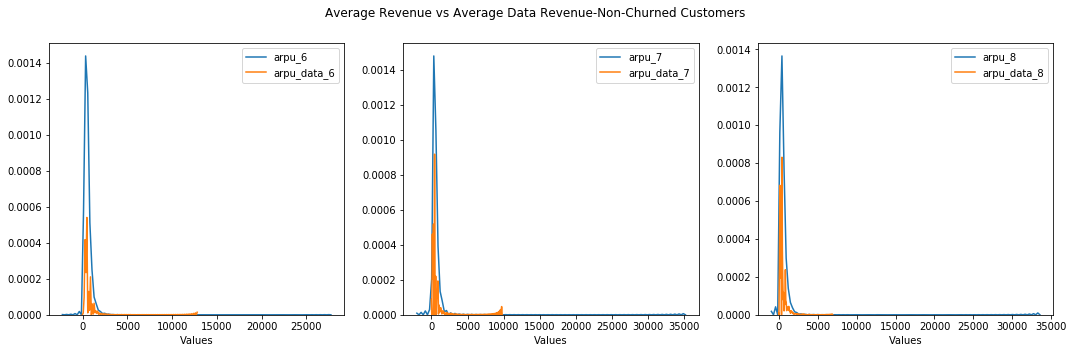

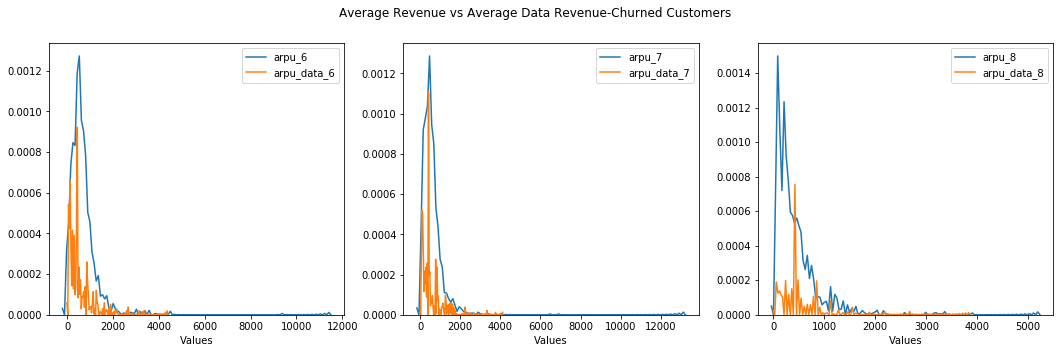

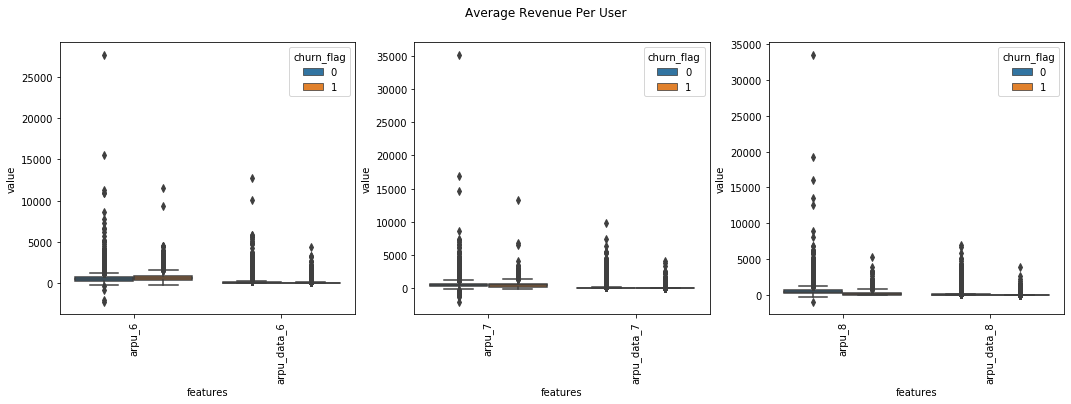

In [258]:
cols = [['arpu_6','arpu_data_6'],
        ['arpu_7','arpu_data_7'],
        ['arpu_8','arpu_data_8']]

dist_plot(telecom[telecom['churn_flag']==0],cols,'Average Revenue vs Average Data Revenue-Non-Churned Customers')
dist_plot(telecom[telecom['churn_flag']==1],cols,'Average Revenue vs Average Data Revenue-Churned Customers')
box_plot(telecom,cols,'Average Revenue Per User')

**Observation:**
    1. Average revenue per user has significantly reduced for the churned customers
    2. Have significant outliers for both churned and non-churned customers
    3. Average data revenue is low compared to average total revenue

#### Incoming Calls:
Plot of various incoming calls

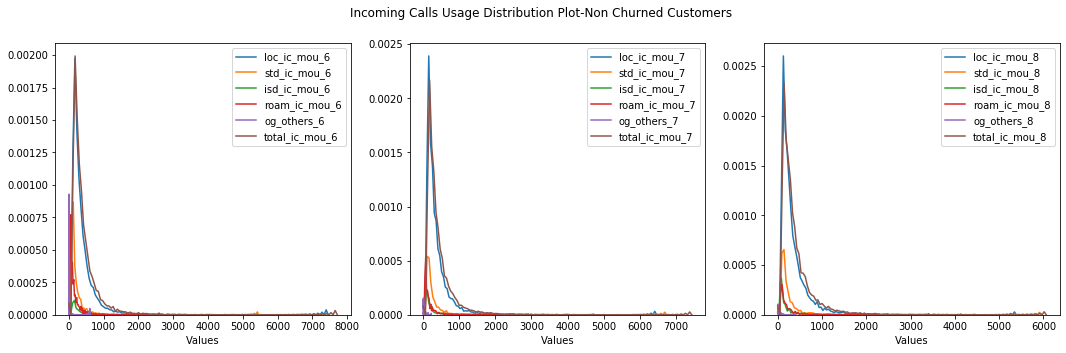

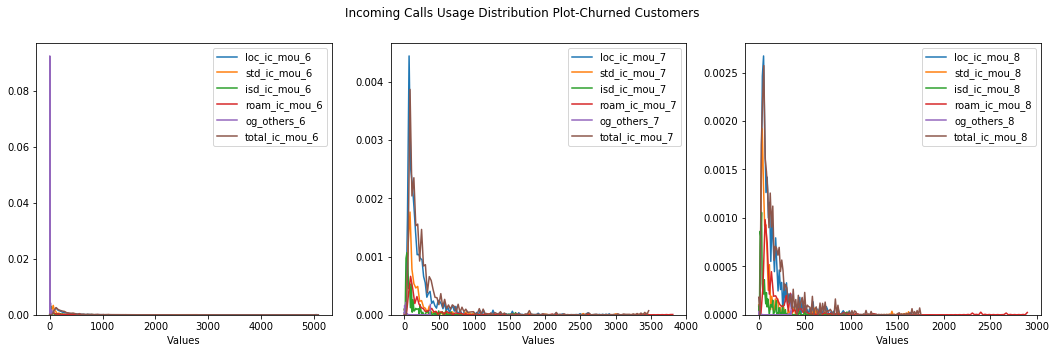

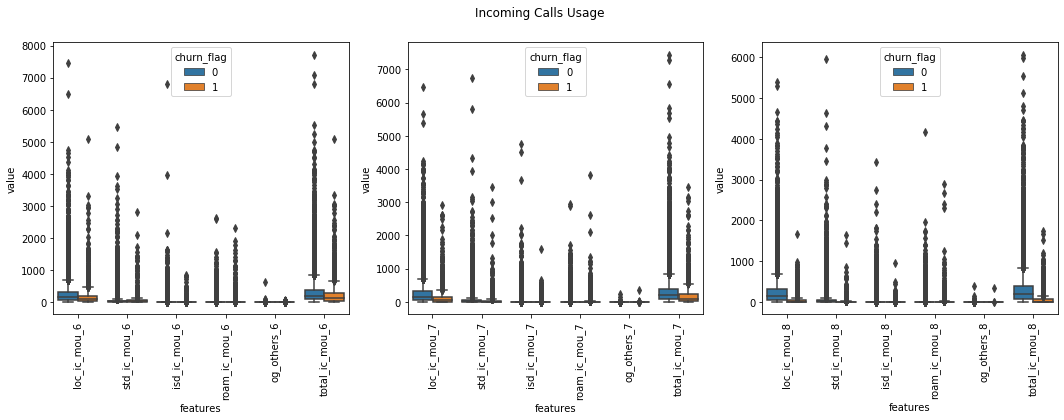

In [259]:
cols = [['loc_ic_mou_6','std_ic_mou_6','isd_ic_mou_6','roam_ic_mou_6','og_others_6','total_ic_mou_6'],
        ['loc_ic_mou_7','std_ic_mou_7','isd_ic_mou_7','roam_ic_mou_7','og_others_7','total_ic_mou_7'],
        ['loc_ic_mou_8','std_ic_mou_8','isd_ic_mou_8','roam_ic_mou_8','og_others_8','total_ic_mou_8']]

dist_plot(telecom[telecom['churn_flag']==0],cols,'Incoming Calls Usage Distribution Plot-Non Churned Customers')
dist_plot(telecom[telecom['churn_flag']==1],cols,'Incoming Calls Usage Distribution Plot-Churned Customers')
box_plot(telecom,cols,'Incoming Calls Usage')

**Observation:**
    1. Local calls usage higher compared to other type of call
    2. Voice Usage for Churned customers is lower compared to non-churned customers
    3. Presence of outliers
    4. Usage of Churned customers reduced on the action month, however has increased for the Non-churned customers

#### Outgoing calls

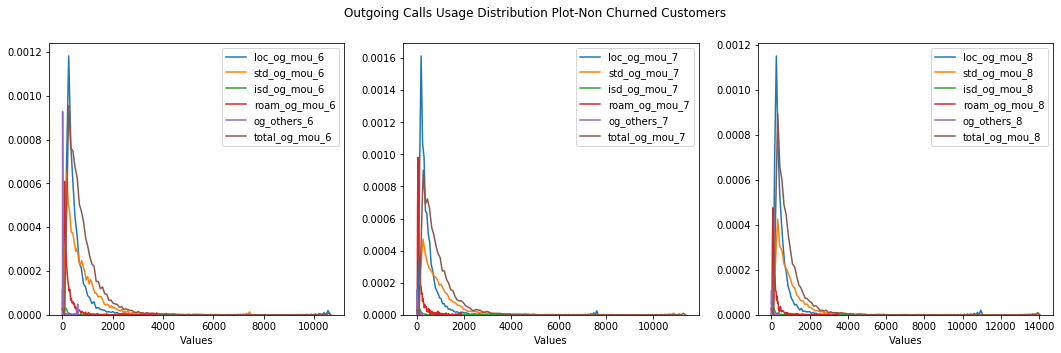

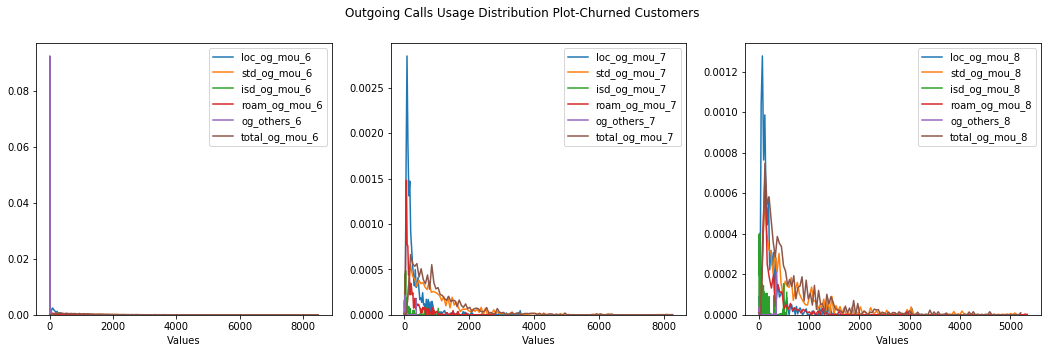

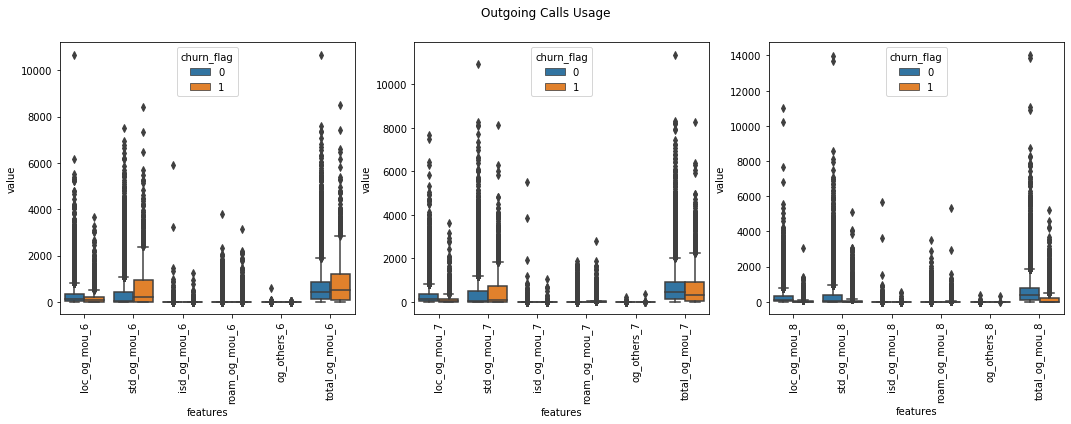

In [260]:
cols = [['loc_og_mou_6','std_og_mou_6','isd_og_mou_6','roam_og_mou_6','og_others_6','total_og_mou_6'],
        ['loc_og_mou_7','std_og_mou_7','isd_og_mou_7','roam_og_mou_7','og_others_7','total_og_mou_7'],
        ['loc_og_mou_8','std_og_mou_8','isd_og_mou_8','roam_og_mou_8','og_others_8','total_og_mou_8']]

dist_plot(telecom[telecom['churn_flag']==0],cols,'Outgoing Calls Usage Distribution Plot-Non Churned Customers')
dist_plot(telecom[telecom['churn_flag']==1],cols,'Outgoing Calls Usage Distribution Plot-Churned Customers')
box_plot(telecom,cols,'Outgoing Calls Usage')

**Observation:**
    1. STD calls show higher variation amongst Churned customers
    2. Presence of outliers
    3. Usage of Churned customers reduced on the action month

#### Total Outgoing Vs Total Incoming

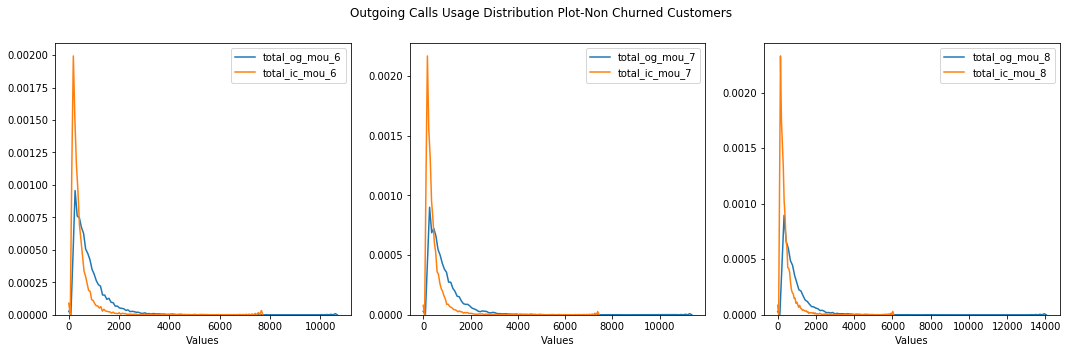

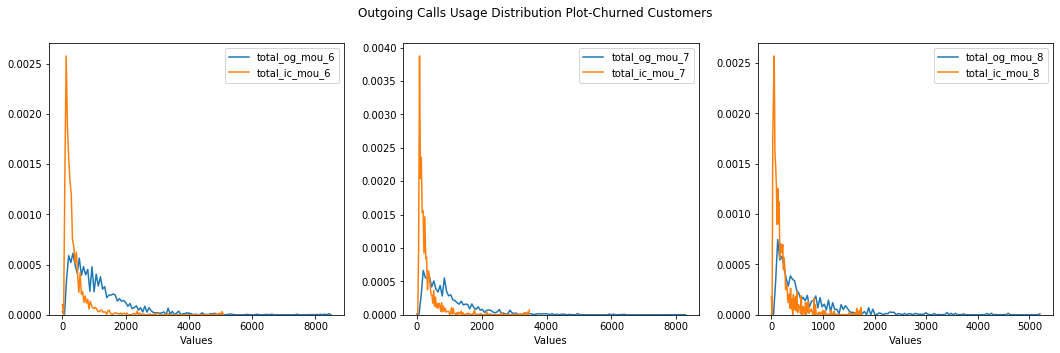

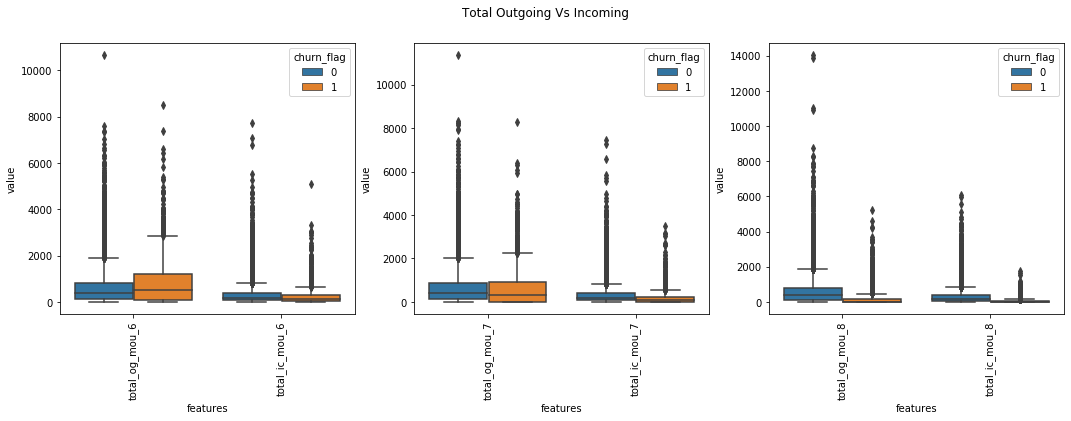

In [261]:
cols = [['total_og_mou_6','total_ic_mou_6'],
        ['total_og_mou_7','total_ic_mou_7'],
        ['total_og_mou_8','total_ic_mou_8']]

dist_plot(telecom[telecom['churn_flag']==0],cols,'Outgoing Calls Usage Distribution Plot-Non Churned Customers')
dist_plot(telecom[telecom['churn_flag']==1],cols,'Outgoing Calls Usage Distribution Plot-Churned Customers')
box_plot(telecom,cols,'Total Outgoing Vs Incoming')

**Observation:**
    1. Outgoing usage is more than incoming
    2. Usage of Churned customers decreased gradually

#### Total recharge amount voice, data and total

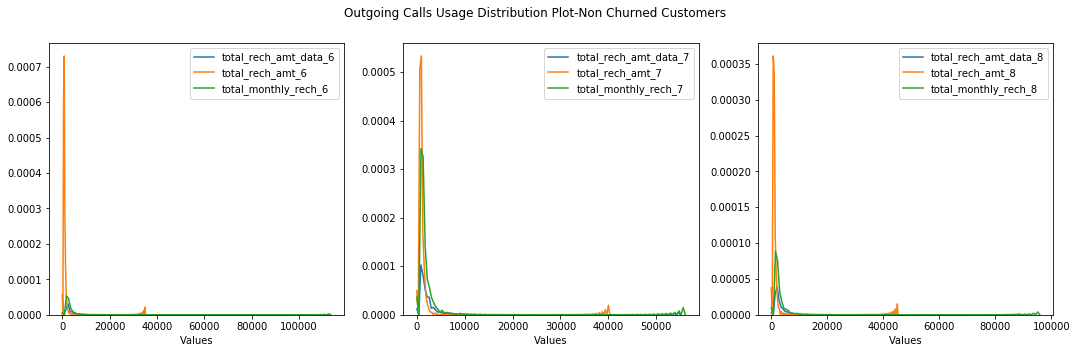

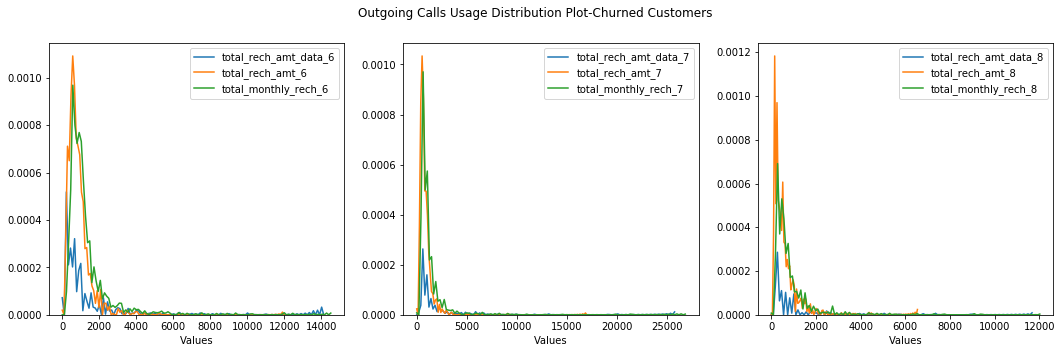

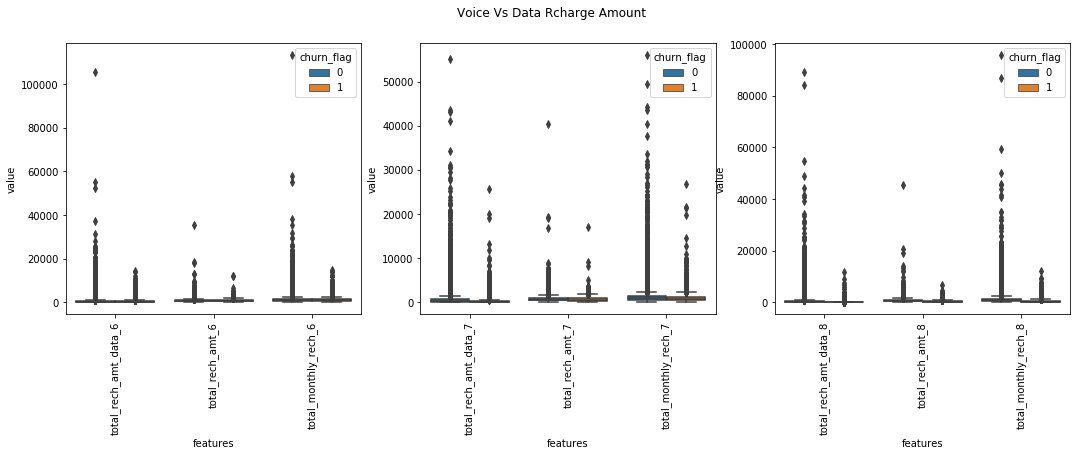

In [262]:
cols = [['total_rech_amt_data_6','total_rech_amt_6','total_monthly_rech_6'],
        ['total_rech_amt_data_7','total_rech_amt_7','total_monthly_rech_7'],
        ['total_rech_amt_data_8','total_rech_amt_8','total_monthly_rech_8']]

dist_plot(telecom[telecom['churn_flag']==0],cols,'Outgoing Calls Usage Distribution Plot-Non Churned Customers')
dist_plot(telecom[telecom['churn_flag']==1],cols,'Outgoing Calls Usage Distribution Plot-Churned Customers')
box_plot(telecom,cols,'Voice Vs Data Rcharge Amount')

**Observation:**
    1. Total recharge amount is on the lower side for churned customers compared to Non churned ones.
    2. Recharge amount is comparatively low for the churned customers
    3. More visible outliers for Non Churned customers i.e.recharge with high values are seen for Non-Churned customers

#### Total Data Usage Vs 2G Vs 3G

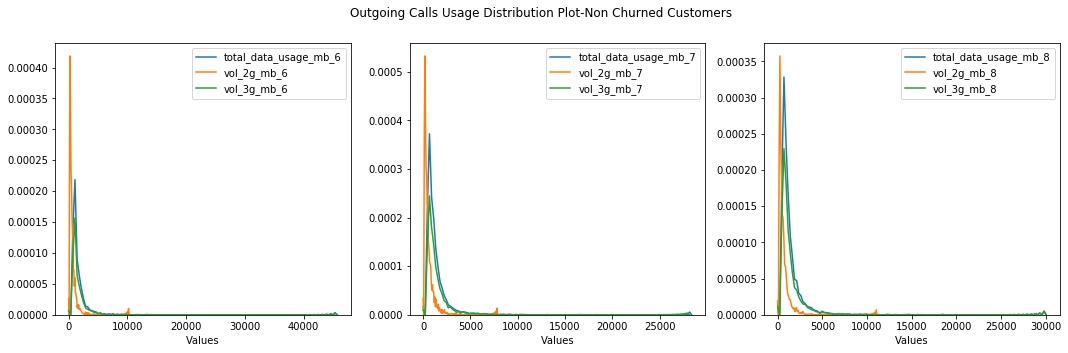

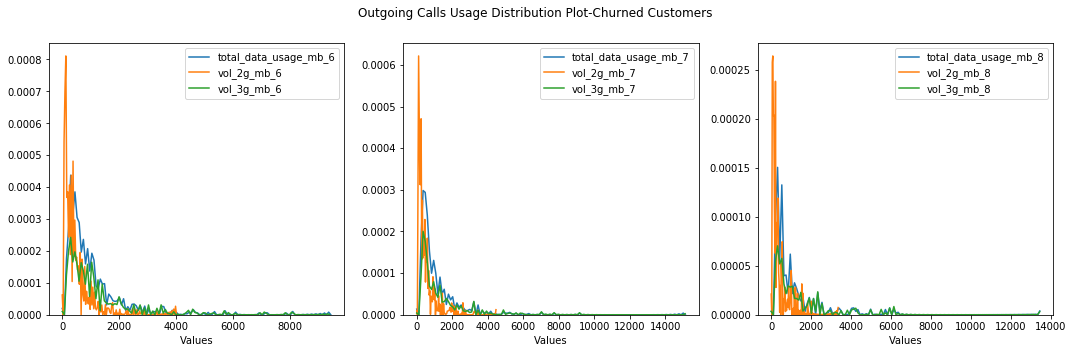

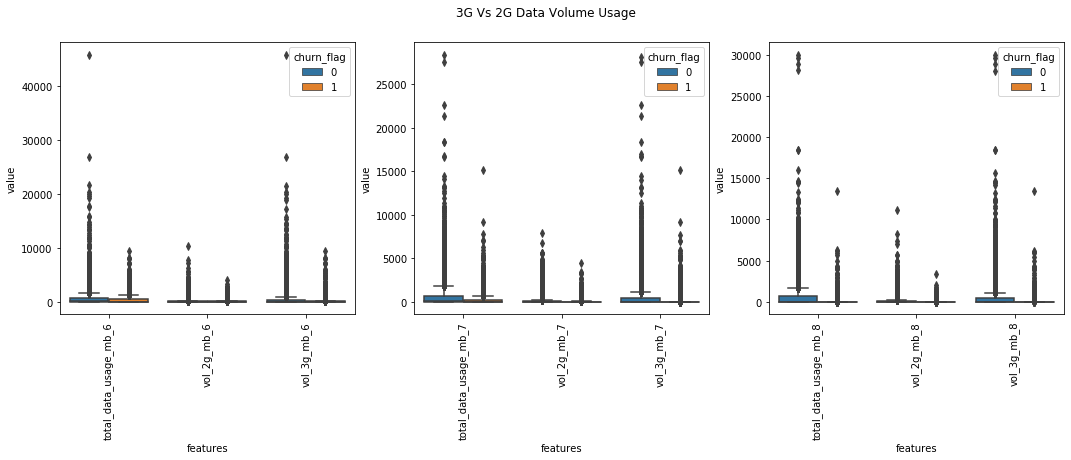

In [263]:
cols = [['total_data_usage_mb_6','vol_2g_mb_6','vol_3g_mb_6'],
        ['total_data_usage_mb_7','vol_2g_mb_7','vol_3g_mb_7'],
        ['total_data_usage_mb_8','vol_2g_mb_8','vol_3g_mb_8']]

dist_plot(telecom[telecom['churn_flag']==0],cols,'Outgoing Calls Usage Distribution Plot-Non Churned Customers')
dist_plot(telecom[telecom['churn_flag']==1],cols,'Outgoing Calls Usage Distribution Plot-Churned Customers')
box_plot(telecom,cols,'3G Vs 2G Data Volume Usage')

#### Onnet Vs Offnet Usage

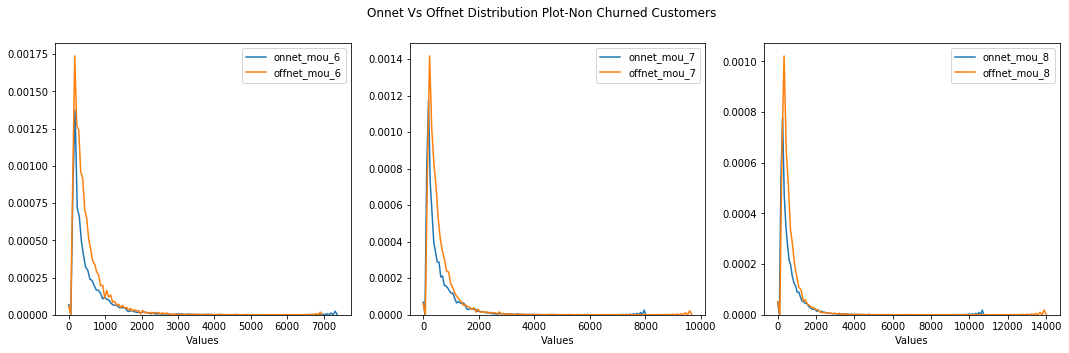

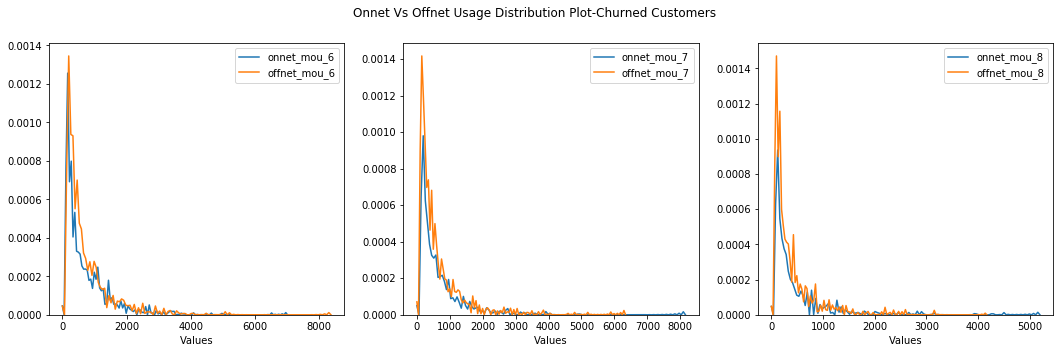

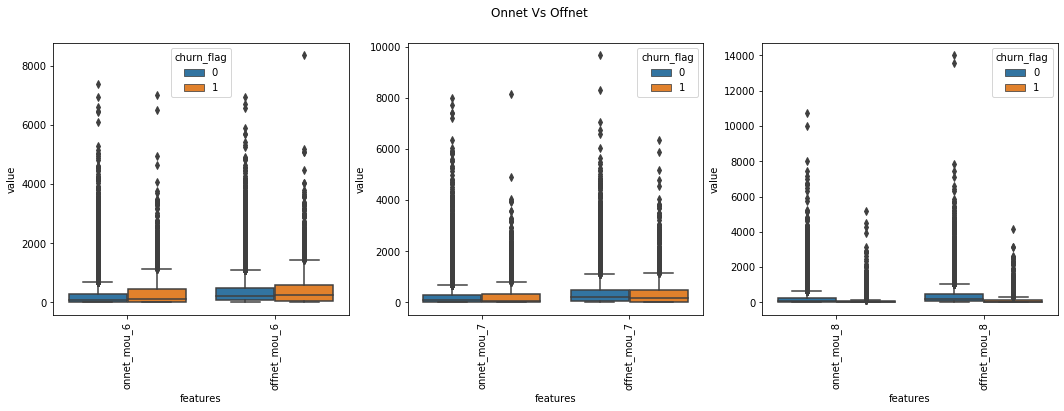

In [264]:
cols = [['onnet_mou_6','offnet_mou_6'],
        ['onnet_mou_7','offnet_mou_7'],
        ['onnet_mou_8','offnet_mou_8']]

dist_plot(telecom[telecom['churn_flag']==0],cols,'Onnet Vs Offnet Distribution Plot-Non Churned Customers')
dist_plot(telecom[telecom['churn_flag']==1],cols,'Onnet Vs Offnet Usage Distribution Plot-Churned Customers')
box_plot(telecom,cols,'Onnet Vs Offnet')

#### Days since last recharge

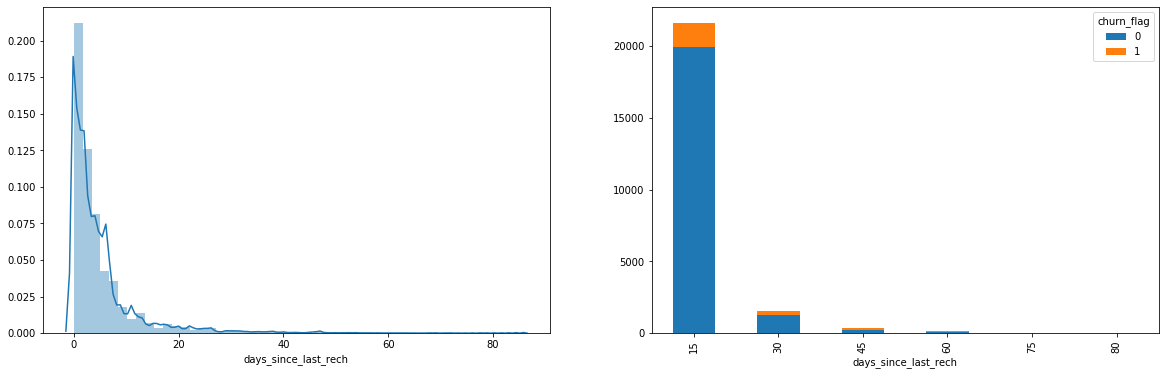

In [265]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20, 6))

# distribution plot for aon
sns.distplot(telecom['days_since_last_rech'], ax=ax1)

# bin the aon column with yearwise segments and plot the counts for each segments
bins = [0, 15, 30, 45, 60, 75, 80]
labels = [15, 30, 45, 60, 75, 80]

pd.crosstab(pd.cut(telecom['days_since_last_rech'], bins = bins, labels = labels ), telecom['churn_flag']).plot(kind='bar', stacked=True, ax = ax2)

Most of the churned customers recharged within last 45 days

#### Check correlations

Check pairs with high correlations

In [267]:
cols_to_exclude=['night_pck_user_6','night_pck_user_7','night_pck_user_8',
'fb_user_6','fb_user_7','fb_user_8',
'monthly_2g_6','monthly_2g_7','monthly_2g_8',
'monthly_3g_6','monthly_3g_7','monthly_3g_8',
'sachet_2g_6','sachet_2g_7','sachet_2g_8',
'sachet_3g_6','sachet_3g_7','sachet_3g_8','churn_flag']

cols = list(set(telecom.columns).difference(set(cols_to_exclude)))

df=telecom[cols]

joincorr= df.corr()
df_corr = joincorr.stack().reset_index().sort_values(by = 0, ascending = False)
df_corr = df_corr[((df_corr[0] >= 0.5) & (df_corr[0] < 1)) | ((df_corr[0] <= -0.5) & (df_corr[0] > -1))]
df_corr

,level_0,level_1,0
6563,arpu_3g_6,arpu_data_6,0.986486
8543,arpu_data_6,arpu_3g_6,0.986486
21650,arpu_3g_8,arpu_data_8,0.985976
20210,arpu_data_8,arpu_3g_8,0.985976
24338,arpu_3g_7,arpu_data_7,0.985595
15338,arpu_data_7,arpu_3g_7,0.985595
409,arpu_2g_6,arpu_data_6,0.983239
8509,arpu_data_6,arpu_2g_6,0.983239
20194,arpu_data_8,arpu_2g_8,0.982535
18754,arpu_2g_8,arpu_data_8,0.982535


### 8. Outlier Treatment

In [272]:
# Find out columns with outliers
cols_to_exclude=['night_pck_user_6','night_pck_user_7','night_pck_user_8',
'fb_user_6','fb_user_7','fb_user_8',
'monthly_2g_6','monthly_2g_7','monthly_2g_8',
'monthly_3g_6','monthly_3g_7','monthly_3g_8',
'sachet_2g_6','sachet_2g_7','sachet_2g_8',
'sachet_3g_6','sachet_3g_7','sachet_3g_8','churn_flag']

cols = list(set(telecom.columns).difference(set(cols_to_exclude)))
cols_outlier=[]
for i in cols:
    if round(np.percentile(telecom[i],99)/telecom[i].max()*100,2) < 20:
        cols_outlier.append(i)
        
print(cols_outlier)

['std_og_t2f_mou_8', 'count_rech_3g_6', 'arpu_2g_6', 'arpu_data_total_ratio_7', 'vol_2g_mb_7', 'offnet_mou_8', 'isd_og_mou_7', 'loc_ic_t2t_mou_8', 'isd_og_mou_6', 'std_og_t2m_mou_8', 'loc_ic_t2t_mou_6', 'vol_3g_mb_8', 'arpu_data_total_ratio_6', 'loc_og_t2t_mou_8', 'og_others_6', 'isd_ic_mou_6', 'std_og_t2f_mou_6', 'std_ic_t2t_mou_8', 'std_og_mou_8', 'count_rech_3g_8', 'vol_3g_mb_6', 'total_og_ic_6', 'loc_og_t2t_mou_7', 'onnet_offnet_ratio_8', 'total_rech_num_6', 'ic_others_8', 'arpu_3g_6', 'total_roam_mou_6', 'last_day_rch_amt_7', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'isd_ic_mou_8', 'total_rech_amt_6', 'total_monthly_rech_8', 'offnet_mou_action_to_good_ratio', 'arpu_data_6', 'roam_ic_mou_7', 'total_og_ic_7', 'total_monthly_rech_7', 'total_roam_mou_7', 'loc_ic_t2f_mou_7', 'last_day_rch_amt_6', 'total_rech_amt_8', 'arpu_7', 'std_ic_t2f_mou_7', 'av_rech_amt_voice_8', 'av_rech_amt_voice_7', 'total_og_ic_8', 'arpu_action_to_good_ratio', 'total_rech_amt_data_8', 'loc_og_t2c_mou_7', 'total

#### Cap Outliers

In [273]:
# iterate through the columns and cap the values with the 99th percentile
for col in cols_outlier:
    percentiles = telecom[col].quantile([0.01,0.99]).values
    telecom[col][telecom[col] >= percentiles[1]] = percentiles[1]

### 9. Model Building

Following steps will be performed in the Modelling section:
1. Split train and test data
2. Scale data
3. Feature selection using Principal Component Analysis (PCA)
4. Model building for Churn Prediction (with PCA):
  - Logistic Regression
  - Decision Tree
  - Random Forest
  - Gradient Boosting
  - XGBoost
5. Model Evaluation
6. Model Building for feature selection (without PCA):
  - Random Forest
  - Logistic regression

#### 9.1 Split Data

In [321]:
# Split train and test data
from sklearn.model_selection import train_test_split

#putting features variables in X
X = telecom.drop(['churn_flag'], axis=1)

#putting response variables in Y
y = telecom['churn_flag']    

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=42)

#### 9.2 Scale Variables

In [322]:
# Scale variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# fitting and transforming the scaler on train
X_train_scaled = scaler.fit_transform(X_train)
# transforming the train using the already fit scaler
X_test_scaled = scaler.transform(X_test)

In [323]:
# Convert Scaled Data to DataFrame
X_test=pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)

#### 9.3 Handling Class Imbalance

Class imbalance occurs when number of observations in the data belonging to one class is significantly lower than those belonging to the other classes.

In our dataset only 8.14% of the records are marked as churned customers. Hence the class imbalance. Machine Learning Algorithms are usually designed to improve accuracy by reducing the error. Thus, they do not take into account the class distribution / proportion or balance of classes. Thus, there is a high probability of misclassification of the minority class as compared to the majority class.

**Handling Class Imbalance:**

Resampling Techniques:
    1. Random Under-sampling
    2. Random Over-sampling
    3. Cluster-based over sampling
    4. Synthetic Minority Over-sampling Technique (SMOTE)

Algorithm Ensamble Techniques:
    1. Bagging based techniques
    2. Boosting based techniques
    
We will use SMOTE as the resmapling technique to handle class imbalance.

In [324]:
# Count before resampling
print("Shape of X_Train:" ,X_train_scaled.shape)
print("Shape of y_Train:" ,y_train.shape)

Shape of X_Train: (21000, 199)
Shape of y_Train: (21000,)


In [325]:
# Class wise percentage before resmapling
y_train.value_counts()

0    19260
1     1740
Name: churn_flag, dtype: int64

In [326]:
# Handing Class Imbalance
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42,sampling_strategy=1.0)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

In [327]:
X_train_res=pd.DataFrame(X_train_res, columns=X_train.columns)
y_train_res=pd.DataFrame(y_train_res, columns=['churn_flag'])

In [328]:
# Count before resampling
print("Shape of X_Train:" ,X_train_res.shape)
print("Shape of y_Train:" ,y_train_res.shape)

Shape of X_Train: (38520, 199)
Shape of y_Train: (38520, 1)


In [329]:
# Class wise percentage before resmapling
y_train_res.groupby('churn_flag')['churn_flag'].count()

churn_flag
0    19260
1    19260
Name: churn_flag, dtype: int64

#### 9.4 Pricipal Component Analysis

In [330]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [331]:
pca.fit(X_train_res)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [332]:
pca.explained_variance_ratio_

array([1.26472334e-01, 9.87418682e-02, 5.94724746e-02, 5.64331084e-02,
       4.97590257e-02, 3.97726896e-02, 3.15961733e-02, 2.65427362e-02,
       2.37768599e-02, 2.27110498e-02, 2.00944939e-02, 1.73055571e-02,
       1.60288680e-02, 1.50121663e-02, 1.48613752e-02, 1.33875065e-02,
       1.17436425e-02, 1.12821559e-02, 1.10572870e-02, 1.05883052e-02,
       1.00514708e-02, 9.59077861e-03, 9.05173252e-03, 8.35119838e-03,
       7.92023940e-03, 7.79408488e-03, 7.61954511e-03, 7.24838437e-03,
       6.89663529e-03, 6.69019938e-03, 6.18014946e-03, 6.07631691e-03,
       5.93603265e-03, 5.70341507e-03, 5.47269019e-03, 5.35609294e-03,
       5.21169947e-03, 5.06337092e-03, 4.94282157e-03, 4.83849033e-03,
       4.80252593e-03, 4.77391266e-03, 4.55733788e-03, 4.22119872e-03,
       4.14543949e-03, 4.02920755e-03, 3.95694031e-03, 3.84413276e-03,
       3.77127742e-03, 3.57755019e-03, 3.54412987e-03, 3.43306042e-03,
       3.35748510e-03, 3.31199102e-03, 3.20823257e-03, 3.15103601e-03,
      

In [335]:
pca.explained_variance_ratio_.cumsum()

array([0.12647233, 0.2252142 , 0.28468668, 0.34111979, 0.39087881,
       0.4306515 , 0.46224767, 0.48879041, 0.51256727, 0.53527832,
       0.55537281, 0.57267837, 0.58870724, 0.60371941, 0.61858078,
       0.63196829, 0.64371193, 0.65499409, 0.66605137, 0.67663968,
       0.68669115, 0.69628193, 0.70533366, 0.71368486, 0.7216051 ,
       0.72939918, 0.73701873, 0.74426711, 0.75116375, 0.75785395,
       0.7640341 , 0.77011041, 0.77604645, 0.78174986, 0.78722255,
       0.79257864, 0.79779034, 0.80285371, 0.80779654, 0.81263503,
       0.81743755, 0.82221146, 0.8267688 , 0.83099   , 0.83513544,
       0.83916465, 0.84312159, 0.84696572, 0.850737  , 0.85431455,
       0.85785868, 0.86129174, 0.86464922, 0.86796122, 0.87116945,
       0.87432048, 0.87745795, 0.88053327, 0.88356905, 0.88654281,
       0.88947531, 0.89237584, 0.89520716, 0.89798075, 0.90067084,
       0.90330458, 0.90583366, 0.90828221, 0.91070632, 0.91306727,
       0.91537564, 0.9176251 , 0.91982915, 0.9220112 , 0.92417

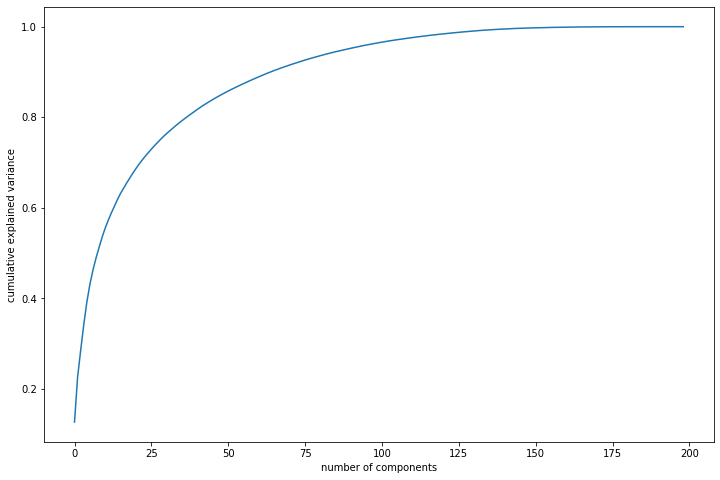

In [336]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

**65 variables** explaining **90%** of the total variance. We will go for **70 variables** because of the below reasons:
1. It's giving the lowest correlation amongst variables
2. It's explaining more than 91% of the total variance

In [346]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=70)

In [347]:
X_train_pca = pca_final.fit_transform(X_train_res)
X_train_pca.shape

(38520, 70)

In [348]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.005561604043646948 , min corr:  -0.004322166580833262


In [349]:
#Applying selected components to the test data - 50 components
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(9001, 70)

#### 9.5 Churn Prediction Model Building - with PCA

Let's first run basic algorithms and fit models on the PCA components to how basic algortihms are performing.

Since the classes (labels) are unbalanced, we cannot use accuracy to access the performance of the classifier that we'll build. A classifier which always returns 0 will have an accuracy around 91% (assuming the given data is well sampled). Instead, we'll use the **F1-score** because it takes into account the precision and recall of the system, which should be the case here.

In [350]:
clfs = {
    'lr': LogisticRegression(),
    'dtc': DecisionTreeClassifier(),
    'rfc': RandomForestClassifier(),
    'gbc': GradientBoostingClassifier(),
    'xgb': XGBClassifier(),
    'ada': AdaBoostClassifier()
}

In [351]:
from sklearn.metrics import f1_score, confusion_matrix
f1_scores = dict()
for clf_name in clfs:
    print(clf_name)
    clf = clfs[clf_name]
    clf.fit(X_train_pca, y_train_res)
    y_pred = clf.predict(X_test_pca)
    f1_scores[clf_name] = f1_score(y_test,y_pred)

lr
dtc
rfc
gbc
xgb
ada


Multinomial Naive Bayes works with non-negative values only. So we need to make the feature values positive before fitting the model. We have chosen **MinMaxScaler()** to scale the data between 0 and 1.

In [352]:
from sklearn.preprocessing import MinMaxScaler
Minmaxscaler = MinMaxScaler()
X_train_minmax = Minmaxscaler.fit_transform(X_train_pca)
X_test_minmax = Minmaxscaler.fit_transform(X_test_pca)

mnb = MultinomialNB()

# fit
mnb.fit(X_train_minmax,y_train_res)
y_pred_mnb = mnb.predict(X_test_minmax)
mnb_score=f1_score(y_test,y_pred_mnb)

In [353]:
f1_scores['mnb']=mnb_score

In [354]:
# Look at f1_scores
f1_scores

{'lr': 0.4490445859872611,
 'dtc': 0.33128834355828224,
 'rfc': 0.4972222222222222,
 'gbc': 0.45869191049913943,
 'xgb': 0.45474045474045477,
 'ada': 0.41813804173354735,
 'mnb': 0.21639120804225595}

Based on the scores above it seems Random Forest, Logistic Regression and Gradient Boosting may result best f1_scores. We will not go for Multinomial Naive Bayes as it's resulting the lowest f1_score

#### 9.5.1 Define Functions

In [355]:
def model_fit_train(alg, X_train, y_train, performCV=False, scoring='f1', cv_folds=5):

    #Fit the algorithm on the data
    alg.fit(X_train, y_train)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, X_train, y_train, cv=cv_folds, scoring=scoring)
    
    print("Accuracy : {}".format(metrics.accuracy_score(y_train,dtrain_predictions)))
    print("Precision : {}".format(metrics.precision_score(y_train,dtrain_predictions)))
    print("Recall : {}".format(metrics.recall_score(y_train,dtrain_predictions)))
    print("F1 Score : {}".format(metrics.f1_score(y_train,dtrain_predictions)))
    print("Roc_auc_score : {}".format(metrics.roc_auc_score(y_train, dtrain_predprob)))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

    print(classification_report(y_train,dtrain_predictions))
        
    plot_roc(y_train,dtrain_predprob)
    
    precision_recall_plot(y_train,dtrain_predprob)    

In [362]:
model_score_df = pd.DataFrame(columns=['Model_Name','ROC_AUC_SCORE','Accuracy','Precision','Recall','F1_Score'])

In [363]:
def model_predict_test(alg,X,y,model_name,index):
    
    pred_probs_test = alg.predict(X)
    test_predprob = alg.predict_proba(X)[:,1]
    
    confusion = metrics.confusion_matrix(y, pred_probs_test)
    
    #plot_confusion_matrix(alg, X, y)
    disp = plot_confusion_matrix(alg, X, y,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
    disp.ax_.set_title('Confusion Matrix')
    
    print("Accuracy : {}".format(metrics.accuracy_score(y_test,pred_probs_test)))
    print("Precision : {}".format(metrics.precision_score(y_test,pred_probs_test)))
    print("Recall : {}".format(metrics.recall_score(y_test,pred_probs_test)))
    print("F1 Score : {}".format(metrics.f1_score(y_test,pred_probs_test)))
    print("Roc_auc_score : {}".format(metrics.roc_auc_score(y_test, test_predprob)))
    
    accu= "{:.3f}".format(metrics.accuracy_score(y_test,pred_probs_test))
    prec= "{:.3f}".format(metrics.precision_score(y_test,pred_probs_test))
    rec= "{:.3f}".format(metrics.recall_score(y_test,pred_probs_test))
    f1= "{:.3f}".format(metrics.f1_score(y_test,pred_probs_test))
    roc= "{:.3f}".format(metrics.roc_auc_score(y_test, test_predprob))
    
    model_score_df.loc[index]=[model_name,roc,accu,prec,rec,f1]
    
    print(classification_report(y_test,pred_probs_test))

In [364]:
def optimal_cutoff(df):
    
    numbers = [float(x)/10 for x in range(10)]
    
    for i in numbers:
        df[i] = df.churn_Prob.map( lambda x: 1 if x > i else 0)
    
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    from sklearn.metrics import confusion_matrix
    
    # TP = confusion[1,1] # true positive 
    # TN = confusion[0,0] # true negatives
    # FP = confusion[0,1] # false positives
    # FN = confusion[1,0] # false negatives
    
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(df.churn, df[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)
    # Let's plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
    plt.show()

In [365]:
def precision_recall_plot(y_actual,y_pred):
    p, r, thresholds = precision_recall_curve(y_actual, y_pred)
    plt.plot(thresholds, p[:-1], "g-")
    plt.plot(thresholds, r[:-1], "r-")
    plt.title('Precision vs Recall Plot')
    plt.show()
    display(p,r,thresholds)

In [367]:
def predict_with_prob(alg,X,y,cut_off_prob):
    
    pred_probs = alg.predict_proba(X)[:,1]
    
    y_df= pd.DataFrame({'churn':y, 'churn_Prob':pred_probs})
    # Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
    y_df['final_predicted'] = y_df.churn_Prob.map( lambda x: 1 if x > cut_off_prob else 0)
    
    confusion = metrics.confusion_matrix(y_df.churn, y_df.final_predicted)
    
    disp = plot_confusion_matrix(alg, X, y,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
    disp.ax_.set_title('Confusion Matrix')

#     TP = confusion[1,1] # true positive 
#     TN = confusion[0,0] # true negatives
#     FP = confusion[0,1] # false positives
#     FN = confusion[1,0] # false negatives

    print("Accuracy : {}".format(metrics.accuracy_score(y_df.churn, y_df.final_predicted)))
    print("Precision : {}".format(metrics.precision_score(y_df.churn, y_df.final_predicted)))
    print("Recall : {}".format(metrics.recall_score(y_df.churn, y_df.final_predicted)))
    print("F1 Score : {}".format(metrics.f1_score(y_df.churn, y_df.final_predicted)))
    print("Roc_auc_score : {}".format(metrics.roc_auc_score(y_df.churn, y_df.final_predicted)))
    
    return y_df

In [368]:
def plot_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs,
                                      drop_intermediate = False )
    auc_score = metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    print(fpr, tpr, thresholds)

#### 9.5.2 Logistic Regression with PCA

In [376]:
# Get the distribution of classes in the test data
y_test.value_counts()

0    8300
1     701
Name: churn_flag, dtype: int64

**Logistic Regression with Class weights:**

We are starting with base logistic regression model with class_weight hyperparameter as 'weights' because that may improve the test performance for an imbalanced dataset.

The weighting for class 0 is calculated as:

    -weighting = n_samples / (n_classes * n_samples_with_class)
    -weighting = 9001/(2*8300)
    -weighting = 0.54

The weighting for class 1 is calculated as:

    -weighting = n_samples / (n_classes * n_samples_with_class)
    -weighting = 9001/(2*701)
    -weighting = 6.42

In [377]:
# calculate heuristic class weighting
from sklearn.utils.class_weight import compute_class_weight

weighting = compute_class_weight('balanced', [0,1], y_test)
print(weighting)

[0.54222892 6.42011412]


In [378]:
weights = {0:0.54, 1:6.42}
lr0 = LogisticRegression(solver='lbfgs',class_weight='weights')

Accuracy : 0.8617860851505711
Precision : 0.8564923769569222
Recall : 0.8692107995846313
F1 Score : 0.8628047209194454
Roc_auc_score : 0.9256656924050729
CV Score : Mean - 0.8618046 | Std - 0.004116458 | Min - 0.8571429 | Max - 0.8687076
              precision    recall  f1-score   support

           0       0.87      0.85      0.86     19260
           1       0.86      0.87      0.86     19260

    accuracy                           0.86     38520
   macro avg       0.86      0.86      0.86     38520
weighted avg       0.86      0.86      0.86     38520



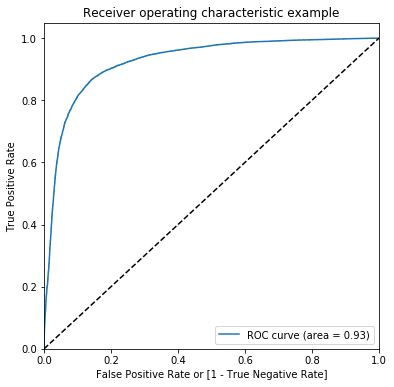

[0.         0.         0.         ... 0.99989616 0.99994808 1.        ] [0.0000000e+00 5.1921080e-05 1.0384216e-04 ... 1.0000000e+00 1.0000000e+00
 1.0000000e+00] [1.99944617e+000 9.99446171e-001 9.99434313e-001 ... 7.37307763e-008
 7.10729567e-016 5.67202982e-238]


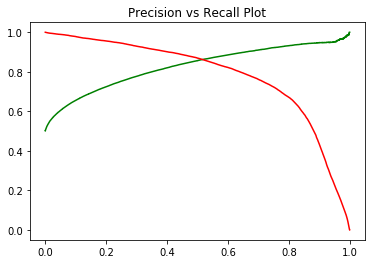

array([0.50027273, 0.50025975, 0.50027275, ..., 1.        , 1.        ,
       1.        ])

array([1.00000000e+00, 9.99948079e-01, 9.99948079e-01, ...,
       1.03842160e-04, 5.19210800e-05, 0.00000000e+00])

array([8.32921112e-06, 9.44223629e-06, 9.59597407e-06, ...,
       9.99367730e-01, 9.99434313e-01, 9.99446171e-01])

In [379]:
model_fit_train(lr0,X_train_pca,y_train_res,True)

Accuracy : 0.8462393067436952
Precision : 0.31143014908890115
Recall : 0.8045649072753209
F1 Score : 0.4490445859872611
Roc_auc_score : 0.8963796985373734
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      8300
           1       0.31      0.80      0.45       701

    accuracy                           0.85      9001
   macro avg       0.65      0.83      0.68      9001
weighted avg       0.93      0.85      0.87      9001



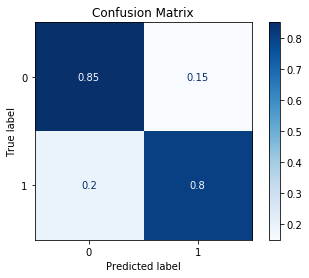

In [380]:
model_predict_test(lr0,X_test_pca,y_test,'LogisticRegression',1)

Let's try hyperparameter **class_weight = 'balanced'** this time, to see if that improves the model performance

In [381]:
lr1 = LogisticRegression(solver='lbfgs',class_weight='balanced')

Accuracy : 0.8617860851505711
Precision : 0.8564923769569222
Recall : 0.8692107995846313
F1 Score : 0.8628047209194454
Roc_auc_score : 0.9256656924050729
CV Score : Mean - 0.8618046 | Std - 0.004116458 | Min - 0.8571429 | Max - 0.8687076
              precision    recall  f1-score   support

           0       0.87      0.85      0.86     19260
           1       0.86      0.87      0.86     19260

    accuracy                           0.86     38520
   macro avg       0.86      0.86      0.86     38520
weighted avg       0.86      0.86      0.86     38520



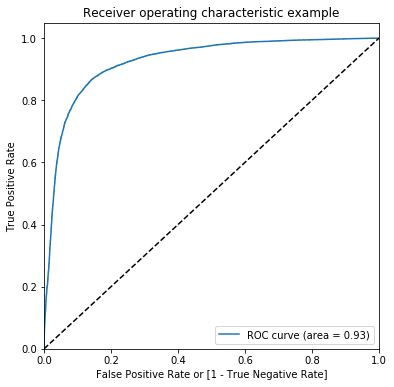

[0.         0.         0.         ... 0.99989616 0.99994808 1.        ] [0.0000000e+00 5.1921080e-05 1.0384216e-04 ... 1.0000000e+00 1.0000000e+00
 1.0000000e+00] [1.99944617e+000 9.99446171e-001 9.99434313e-001 ... 7.37307763e-008
 7.10729567e-016 5.67202982e-238]


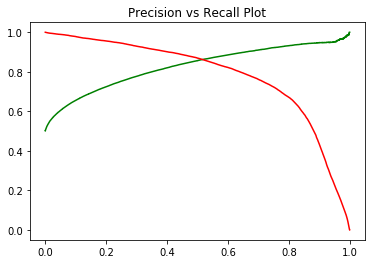

array([0.50027273, 0.50025975, 0.50027275, ..., 1.        , 1.        ,
       1.        ])

array([1.00000000e+00, 9.99948079e-01, 9.99948079e-01, ...,
       1.03842160e-04, 5.19210800e-05, 0.00000000e+00])

array([8.32921112e-06, 9.44223629e-06, 9.59597407e-06, ...,
       9.99367730e-01, 9.99434313e-01, 9.99446171e-01])

In [382]:
model_fit_train(lr1,X_train_pca,y_train_res,True)

Accuracy : 0.8462393067436952
Precision : 0.31143014908890115
Recall : 0.8045649072753209
F1 Score : 0.4490445859872611
Roc_auc_score : 0.8963796985373734
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      8300
           1       0.31      0.80      0.45       701

    accuracy                           0.85      9001
   macro avg       0.65      0.83      0.68      9001
weighted avg       0.93      0.85      0.87      9001



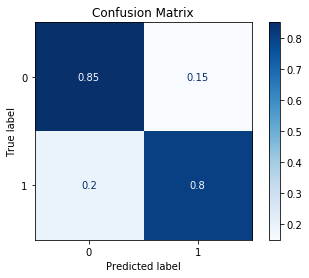

In [383]:
model_predict_test(lr1,X_test_pca,y_test,'LogisticRegression_balanced',2)

**Both hyperparameter values 'balanced' and 'weights' resulted in exactly same roc_auc_score and f1_score. Now we will try to optimize the model using the optimal cut-off probability. Hence we can get the heuristic of 'weights' by setting the class_weight to ‘balanced.’**

Accuracy : 0.8617860851505711
Precision : 0.8564923769569222
Recall : 0.8692107995846313
F1 Score : 0.8628047209194454
Roc_auc_score : 0.8617860851505711


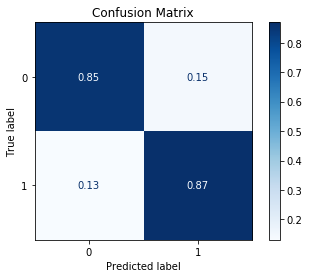

In [386]:
# Starting with default cut-off as 0.5
cut_off_prob=0.5

y_train_df=predict_with_prob(lr1,X_train_pca,y_train_res['churn_flag'],cut_off_prob)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.732347  0.978193  0.486501
0.2   0.2  0.796132  0.955763  0.636501
0.3   0.3  0.831516  0.929439  0.733593
0.4   0.4  0.852025  0.901350  0.802700
0.5   0.5  0.861786  0.869211  0.854361
0.6   0.6  0.857632  0.821807  0.893458
0.7   0.7  0.843198  0.761475  0.924922
0.8   0.8  0.810826  0.670613  0.951038
0.9   0.9  0.704283  0.432606  0.975961


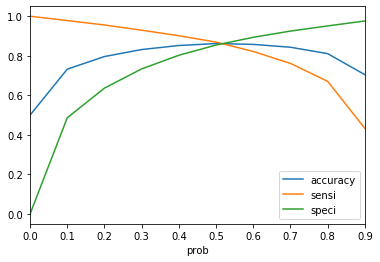

In [387]:
optimal_cutoff(y_train_df)

Accuracy : 0.8617860851505711
Precision : 0.8564923769569222
Recall : 0.8692107995846313
F1 Score : 0.8628047209194454
Roc_auc_score : 0.8617860851505711


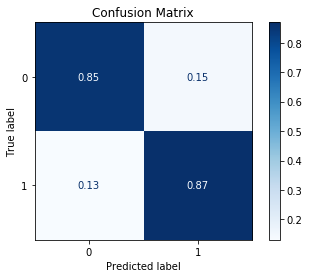

In [402]:
cut_off_prob=0.50

y_train_df=predict_with_prob(lr1,X_train_pca,y_train_res['churn_flag'],cut_off_prob)

Accuracy : 0.8462393067436952
Precision : 0.31143014908890115
Recall : 0.8045649072753209
F1 Score : 0.4490445859872611
Roc_auc_score : 0.8271619717099497


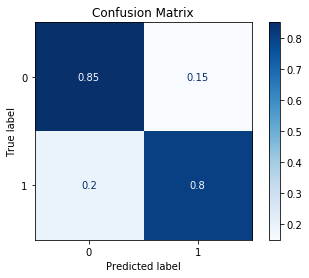

In [403]:
cut_off_prob=0.50

y_test_df=predict_with_prob(lr1,X_test_pca,y_test,cut_off_prob)

Accuracy : 0.8606697819314642
Precision : 0.8717687985014718
Recall : 0.845742471443406
F1 Score : 0.8585584398471472
Roc_auc_score : 0.8606697819314642


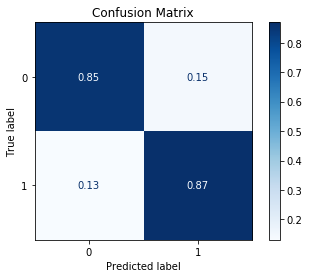

In [404]:
cut_off_prob=0.55

y_train_df=predict_with_prob(lr1,X_train_pca,y_train_res['churn_flag'],cut_off_prob)

Accuracy : 0.8655704921675369
Precision : 0.34260977118119973
Recall : 0.7902995720399429
F1 Score : 0.4779982743744607
Roc_auc_score : 0.8311136414416583


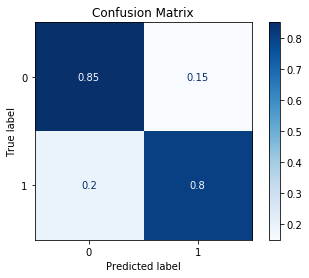

In [405]:
cut_off_prob=0.55

y_test_df=predict_with_prob(lr1,X_test_pca,y_test,cut_off_prob)

Looking at the results of both the cut-off 0.5 and 0.55, we can conclude that cut-off=0.55 gives better roc_auc_score and f1_score.

In [409]:
model_score_df.loc['3']=['LogisticRegression_Final','0.831','0.866','0.343','0.791','0.478']

In [410]:
model_score_df

,Model_Name,ROC_AUC_SCORE,Accuracy,Precision,Recall,F1_Score
1,LogisticRegression,0.896,0.846,0.311,0.805,0.449
2,LogisticRegression_balanced,0.896,0.846,0.311,0.805,0.449
3,LogisticRegression_Final,0.831,0.866,0.343,0.791,0.478


#### 9.5.3 Decision Tree with PCA

We are starting with class_weight hyperparameter as 'balanced', keeping other hyperparameters as standard for the base model

In [415]:
# Start with a base model
dt0 = DecisionTreeClassifier(class_weight='balanced',
                             max_features='auto',
                             min_samples_split=100,
                             min_samples_leaf=100,
                             max_depth=6,
                             random_state=42)

Accuracy : 0.744392523364486
Precision : 0.7042082429501084
Recall : 0.8427829698857736
F1 Score : 0.7672890569605294
Roc_auc_score : 0.8157785857086014
              precision    recall  f1-score   support

           0       0.80      0.65      0.72     19260
           1       0.70      0.84      0.77     19260

    accuracy                           0.74     38520
   macro avg       0.75      0.74      0.74     38520
weighted avg       0.75      0.74      0.74     38520



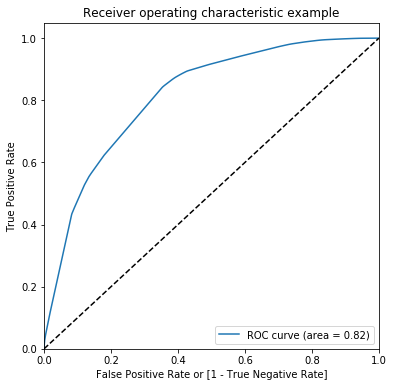

[0.00000000e+00 9.34579439e-04 1.71339564e-03 3.32294912e-03
 4.56905504e-03 1.56801661e-02 1.81204569e-02 8.19833853e-02
 8.30218069e-02 9.02388370e-02 1.19003115e-01 1.20924195e-01
 1.34112150e-01 1.36188993e-01 1.40861890e-01 1.74247144e-01
 1.79646937e-01 3.51609553e-01 3.53997923e-01 3.59241952e-01
 3.81360332e-01 3.85150571e-01 3.90031153e-01 3.94548287e-01
 4.04620976e-01 4.08826584e-01 4.14070613e-01 4.23208723e-01
 4.26687435e-01 4.30581516e-01 4.35669782e-01 4.40654206e-01
 4.85981308e-01 4.94652129e-01 5.89615784e-01 7.01038422e-01
 7.17912773e-01 7.22326064e-01 7.31775701e-01 7.41484943e-01
 7.78920042e-01 7.87954309e-01 8.15732087e-01 8.21858775e-01
 8.28400831e-01 8.35358255e-01 8.41277259e-01 8.49740395e-01
 8.70768432e-01 8.95586708e-01 9.01661475e-01 9.24974039e-01
 9.33333333e-01 9.38473520e-01 9.44392523e-01 9.51661475e-01
 9.88317757e-01 1.00000000e+00] [0.         0.0174974  0.02673936 0.0374351  0.04548287 0.10456906
 0.11734164 0.4305296  0.43468328 0.45342679 0.

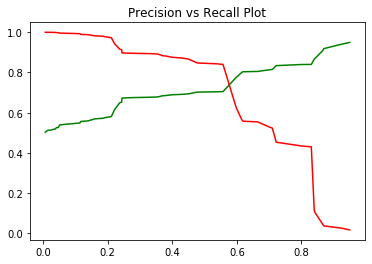

array([0.50293772, 0.51231907, 0.51420864, 0.51574012, 0.51707278,
       0.51925412, 0.52538945, 0.52700998, 0.53369849, 0.53950478,
       0.54187401, 0.54352267, 0.54545455, 0.5472513 , 0.54893629,
       0.55660736, 0.55915369, 0.56975868, 0.57252047, 0.57515422,
       0.57639165, 0.5811645 , 0.61524648, 0.64930428, 0.6526515 ,
       0.67095724, 0.67306943, 0.67524279, 0.67686379, 0.67823306,
       0.68176377, 0.6837878 , 0.68542365, 0.68932952, 0.6910549 ,
       0.69284916, 0.69421316, 0.70231898, 0.70420824, 0.70492375,
       0.77634131, 0.77937019, 0.80051471, 0.8037558 , 0.80521831,
       0.8137396 , 0.81486268, 0.83401776, 0.83963494, 0.84003647,
       0.86623227, 0.86960276, 0.90871369, 0.91847134, 0.93978102,
       0.94929577, 1.        ])

array([1.        , 0.99974039, 0.99963655, 0.99948079, 0.99932503,
       0.99906542, 0.99813084, 0.99787124, 0.99662513, 0.99553479,
       0.9950675 , 0.99465213, 0.994081  , 0.99340602, 0.99273105,
       0.98914849, 0.98795431, 0.98193146, 0.98006231, 0.97788162,
       0.9768432 , 0.97274143, 0.94283489, 0.91583593, 0.91313603,
       0.89854621, 0.89693666, 0.89527518, 0.89376947, 0.89205607,
       0.88707165, 0.88406023, 0.88161994, 0.87544133, 0.87242991,
       0.86879543, 0.86578401, 0.84755971, 0.84278297, 0.83997923,
       0.62357217, 0.6155244 , 0.5652648 , 0.55778816, 0.55441329,
       0.52829699, 0.52377985, 0.45342679, 0.43468328, 0.4305296 ,
       0.11734164, 0.10456906, 0.04548287, 0.0374351 , 0.02673936,
       0.0174974 , 0.        ])

array([0.00703235, 0.01408451, 0.02564103, 0.02941176, 0.03012048,
       0.0385439 , 0.04098361, 0.04780876, 0.04929577, 0.05232558,
       0.06557377, 0.07586207, 0.09352518, 0.09923664, 0.11423841,
       0.11675127, 0.1385902 , 0.16143498, 0.1875    , 0.19047619,
       0.19554455, 0.21160911, 0.2213708 , 0.23744292, 0.24350087,
       0.24409449, 0.24615385, 0.27884615, 0.33      , 0.35294118,
       0.36477987, 0.3671875 , 0.38019169, 0.4       , 0.42682927,
       0.44274809, 0.45173745, 0.47668394, 0.54      , 0.55721925,
       0.5984556 , 0.60086903, 0.61538462, 0.61904762, 0.66446499,
       0.7016129 , 0.7097957 , 0.722     , 0.8       , 0.83062517,
       0.83959044, 0.84171598, 0.86592179, 0.86919831, 0.92227979,
       0.94929577])

In [416]:
# Fit the model on train data
model_fit_train(dt0, X_train_pca, y_train_res)

Accuracy : 0.641595378291301
Precision : 0.14204706549475474
Recall : 0.7146932952924394
F1 Score : 0.23699148533585618
Roc_auc_score : 0.7408219754911228
              precision    recall  f1-score   support

           0       0.96      0.64      0.77      8300
           1       0.14      0.71      0.24       701

    accuracy                           0.64      9001
   macro avg       0.55      0.68      0.50      9001
weighted avg       0.90      0.64      0.72      9001



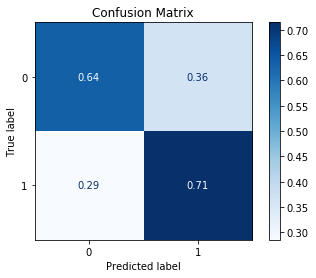

In [417]:
# make predictions with base model
model_predict_test(dt0,X_test_pca,y_test,'DecisionTree_base',4)

Let's try to improve the model with hyperparameter tuning

#### Hyperparameter Tuning

In [418]:
# Grid search to identify best hyperparameters
param_grid = {
    'max_depth': range(5,15,3),
    'min_samples_leaf': range(100, 400, 100),
    'min_samples_split': range(100, 400, 100),
    'max_features': [10,15,20]
}
# Create a based model
dt1 = DecisionTreeClassifier(class_weight='balanced',random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt1, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 1, scoring="roc_auc")

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:   57.7s finished


Accuracy : 0.8419003115264797
Precision : 0.8363469200122586
Recall : 0.8501557632398754
F1 Score : 0.8431948092074774
Roc_auc_score : 0.9260512509044404
              precision    recall  f1-score   support

           0       0.85      0.83      0.84     19260
           1       0.84      0.85      0.84     19260

    accuracy                           0.84     38520
   macro avg       0.84      0.84      0.84     38520
weighted avg       0.84      0.84      0.84     38520



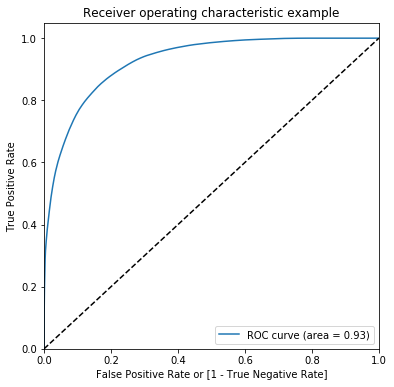

[0.00000000e+00 0.00000000e+00 5.19210800e-05 1.03842160e-04
 1.55763240e-04 2.59605400e-04 3.63447560e-04 8.82658359e-04
 1.09034268e-03 1.19418484e-03 2.12876428e-03 2.23260644e-03
 2.33644860e-03 2.54413292e-03 2.75181724e-03 3.01142264e-03
 3.21910696e-03 3.37487020e-03 3.58255452e-03 3.84215992e-03
 4.20560748e-03 4.51713396e-03 4.82866044e-03 5.24402908e-03
 5.60747664e-03 6.33437175e-03 6.74974039e-03 7.37279335e-03
 7.99584631e-03 8.82658359e-03 9.60539979e-03 1.01246106e-02
 1.09034268e-02 1.17341641e-02 1.23052960e-02 1.34475597e-02
 1.41744548e-02 1.47455867e-02 1.58359294e-02 1.67185877e-02
 1.75493250e-02 1.82242991e-02 1.95742471e-02 2.03011423e-02
 2.08722741e-02 2.21183801e-02 2.33644860e-02 2.42471443e-02
 2.49221184e-02 2.57009346e-02 2.66355140e-02 2.78296989e-02
 2.85565940e-02 2.94911734e-02 3.03738318e-02 3.12564901e-02
 3.20872274e-02 3.29698858e-02 3.47352025e-02 3.58255452e-02
 3.70716511e-02 3.85254413e-02 3.95119418e-02 4.16407061e-02
 4.27310488e-02 4.387331

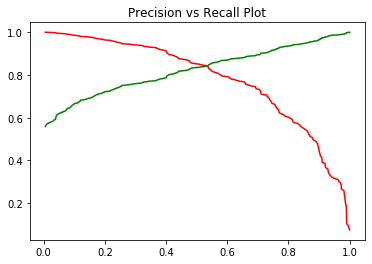

array([0.5589251 , 0.56516508, 0.5673669 , 0.56913164, 0.57245644,
       0.57523605, 0.57818695, 0.57986864, 0.58198754, 0.5837682 ,
       0.58545344, 0.58814715, 0.59022683, 0.59260173, 0.59484973,
       0.59749347, 0.60060041, 0.60412864, 0.60766308, 0.60988015,
       0.61253234, 0.61551303, 0.61749356, 0.61944786, 0.62129467,
       0.62344554, 0.62686274, 0.63060034, 0.6335167 , 0.6356107 ,
       0.63787864, 0.64063496, 0.6436452 , 0.64614186, 0.64858242,
       0.65099983, 0.65386333, 0.65776456, 0.66155882, 0.66356773,
       0.66578947, 0.66778169, 0.66982366, 0.67211951, 0.67567761,
       0.67803479, 0.68176895, 0.68585455, 0.68787182, 0.69190044,
       0.6940169 , 0.69642592, 0.69842215, 0.70141825, 0.70361464,
       0.70589789, 0.709973  , 0.7120229 , 0.7141598 , 0.71617619,
       0.7188092 , 0.72108104, 0.72490808, 0.7284077 , 0.73041794,
       0.7325683 , 0.73467842, 0.73677678, 0.73968024, 0.7417007 ,
       0.74391779, 0.7464484 , 0.74853442, 0.75077215, 0.75497

array([1.        , 0.99989616, 0.99984424, 0.99979232, 0.99968847,
       0.99958463, 0.99942887, 0.99932503, 0.99916926, 0.9990135 ,
       0.99885774, 0.99859813, 0.99839045, 0.99813084, 0.99787124,
       0.99755971, 0.99719626, 0.99678089, 0.99636552, 0.99610592,
       0.99579439, 0.99543094, 0.99517134, 0.99491173, 0.99465213,
       0.9943406 , 0.99376947, 0.99314642, 0.99257529, 0.99215992,
       0.99169263, 0.9911215 , 0.99049844, 0.98997923, 0.9894081 ,
       0.98883697, 0.98816199, 0.98722741, 0.98629283, 0.98577362,
       0.98520249, 0.98468328, 0.98411215, 0.98343718, 0.98239875,
       0.98167186, 0.9805296 , 0.97928349, 0.97855659, 0.9771028 ,
       0.97627207, 0.97528557, 0.97445483, 0.97320872, 0.97227414,
       0.97128764, 0.96952233, 0.96858775, 0.96760125, 0.96661475,
       0.96531672, 0.96417445, 0.96225337, 0.96028037, 0.95913811,
       0.957892  , 0.9566459 , 0.95539979, 0.95363448, 0.95238837,
       0.9509865 , 0.94937695, 0.948027  , 0.94657321, 0.94387

array([0.00520833, 0.00746269, 0.00934579, 0.01      , 0.01204819,
       0.01704545, 0.02      , 0.02380952, 0.02830189, 0.03      ,
       0.03144654, 0.03278689, 0.03597122, 0.03816794, 0.03921569,
       0.03932584, 0.04      , 0.04040404, 0.04065041, 0.04109589,
       0.04294479, 0.0462963 , 0.04716981, 0.05      , 0.05172414,
       0.05945946, 0.06      , 0.07006369, 0.07142857, 0.07438017,
       0.07534247, 0.07594937, 0.07692308, 0.0859375 , 0.08730159,
       0.08783784, 0.09      , 0.09326425, 0.09803922, 0.09821429,
       0.1       , 0.10679612, 0.11206897, 0.11235955, 0.11864407,
       0.11891892, 0.12      , 0.13861386, 0.14      , 0.1509434 ,
       0.15702479, 0.16      , 0.16107383, 0.16513761, 0.16814159,
       0.17      , 0.17821782, 0.18095238, 0.19      , 0.19230769,
       0.19642857, 0.19786096, 0.21714286, 0.22      , 0.22429907,
       0.22857143, 0.23076923, 0.23611111, 0.24      , 0.24545455,
       0.248     , 0.25242718, 0.25454545, 0.25490196, 0.28125

In [420]:
#grid_search.fit(X_train_pca, y_train_res)
model_fit_train(grid_search,X_train_pca,y_train_res)

In [421]:
print('We can get recall of',grid_search.best_score_,'using',grid_search.best_params_)

We can get recall of 0.8972639167904038 using {'max_depth': 14, 'max_features': 20, 'min_samples_leaf': 100, 'min_samples_split': 100}


Accuracy : 0.8419003115264797
Precision : 0.8363469200122586
Recall : 0.8501557632398754
F1 Score : 0.8431948092074774
Roc_auc_score : 0.9260512509044404
              precision    recall  f1-score   support

           0       0.85      0.83      0.84     19260
           1       0.84      0.85      0.84     19260

    accuracy                           0.84     38520
   macro avg       0.84      0.84      0.84     38520
weighted avg       0.84      0.84      0.84     38520



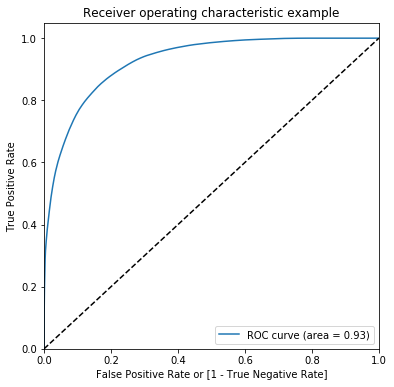

[0.00000000e+00 0.00000000e+00 5.19210800e-05 1.03842160e-04
 1.55763240e-04 2.59605400e-04 3.63447560e-04 8.82658359e-04
 1.09034268e-03 1.19418484e-03 2.12876428e-03 2.23260644e-03
 2.33644860e-03 2.54413292e-03 2.75181724e-03 3.01142264e-03
 3.21910696e-03 3.37487020e-03 3.58255452e-03 3.84215992e-03
 4.20560748e-03 4.51713396e-03 4.82866044e-03 5.24402908e-03
 5.60747664e-03 6.33437175e-03 6.74974039e-03 7.37279335e-03
 7.99584631e-03 8.82658359e-03 9.60539979e-03 1.01246106e-02
 1.09034268e-02 1.17341641e-02 1.23052960e-02 1.34475597e-02
 1.41744548e-02 1.47455867e-02 1.58359294e-02 1.67185877e-02
 1.75493250e-02 1.82242991e-02 1.95742471e-02 2.03011423e-02
 2.08722741e-02 2.21183801e-02 2.33644860e-02 2.42471443e-02
 2.49221184e-02 2.57009346e-02 2.66355140e-02 2.78296989e-02
 2.85565940e-02 2.94911734e-02 3.03738318e-02 3.12564901e-02
 3.20872274e-02 3.29698858e-02 3.47352025e-02 3.58255452e-02
 3.70716511e-02 3.85254413e-02 3.95119418e-02 4.16407061e-02
 4.27310488e-02 4.387331

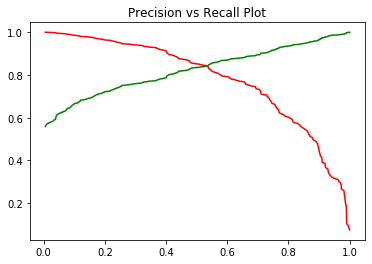

array([0.5589251 , 0.56516508, 0.5673669 , 0.56913164, 0.57245644,
       0.57523605, 0.57818695, 0.57986864, 0.58198754, 0.5837682 ,
       0.58545344, 0.58814715, 0.59022683, 0.59260173, 0.59484973,
       0.59749347, 0.60060041, 0.60412864, 0.60766308, 0.60988015,
       0.61253234, 0.61551303, 0.61749356, 0.61944786, 0.62129467,
       0.62344554, 0.62686274, 0.63060034, 0.6335167 , 0.6356107 ,
       0.63787864, 0.64063496, 0.6436452 , 0.64614186, 0.64858242,
       0.65099983, 0.65386333, 0.65776456, 0.66155882, 0.66356773,
       0.66578947, 0.66778169, 0.66982366, 0.67211951, 0.67567761,
       0.67803479, 0.68176895, 0.68585455, 0.68787182, 0.69190044,
       0.6940169 , 0.69642592, 0.69842215, 0.70141825, 0.70361464,
       0.70589789, 0.709973  , 0.7120229 , 0.7141598 , 0.71617619,
       0.7188092 , 0.72108104, 0.72490808, 0.7284077 , 0.73041794,
       0.7325683 , 0.73467842, 0.73677678, 0.73968024, 0.7417007 ,
       0.74391779, 0.7464484 , 0.74853442, 0.75077215, 0.75497

array([1.        , 0.99989616, 0.99984424, 0.99979232, 0.99968847,
       0.99958463, 0.99942887, 0.99932503, 0.99916926, 0.9990135 ,
       0.99885774, 0.99859813, 0.99839045, 0.99813084, 0.99787124,
       0.99755971, 0.99719626, 0.99678089, 0.99636552, 0.99610592,
       0.99579439, 0.99543094, 0.99517134, 0.99491173, 0.99465213,
       0.9943406 , 0.99376947, 0.99314642, 0.99257529, 0.99215992,
       0.99169263, 0.9911215 , 0.99049844, 0.98997923, 0.9894081 ,
       0.98883697, 0.98816199, 0.98722741, 0.98629283, 0.98577362,
       0.98520249, 0.98468328, 0.98411215, 0.98343718, 0.98239875,
       0.98167186, 0.9805296 , 0.97928349, 0.97855659, 0.9771028 ,
       0.97627207, 0.97528557, 0.97445483, 0.97320872, 0.97227414,
       0.97128764, 0.96952233, 0.96858775, 0.96760125, 0.96661475,
       0.96531672, 0.96417445, 0.96225337, 0.96028037, 0.95913811,
       0.957892  , 0.9566459 , 0.95539979, 0.95363448, 0.95238837,
       0.9509865 , 0.94937695, 0.948027  , 0.94657321, 0.94387

array([0.00520833, 0.00746269, 0.00934579, 0.01      , 0.01204819,
       0.01704545, 0.02      , 0.02380952, 0.02830189, 0.03      ,
       0.03144654, 0.03278689, 0.03597122, 0.03816794, 0.03921569,
       0.03932584, 0.04      , 0.04040404, 0.04065041, 0.04109589,
       0.04294479, 0.0462963 , 0.04716981, 0.05      , 0.05172414,
       0.05945946, 0.06      , 0.07006369, 0.07142857, 0.07438017,
       0.07534247, 0.07594937, 0.07692308, 0.0859375 , 0.08730159,
       0.08783784, 0.09      , 0.09326425, 0.09803922, 0.09821429,
       0.1       , 0.10679612, 0.11206897, 0.11235955, 0.11864407,
       0.11891892, 0.12      , 0.13861386, 0.14      , 0.1509434 ,
       0.15702479, 0.16      , 0.16107383, 0.16513761, 0.16814159,
       0.17      , 0.17821782, 0.18095238, 0.19      , 0.19230769,
       0.19642857, 0.19786096, 0.21714286, 0.22      , 0.22429907,
       0.22857143, 0.23076923, 0.23611111, 0.24      , 0.24545455,
       0.248     , 0.25242718, 0.25454545, 0.25490196, 0.28125

In [423]:
# Initialize the final model with the optimal hyperparameter values
dt_final = DecisionTreeClassifier(class_weight='balanced',
                             max_depth=14,
                             max_features=20,
                             min_samples_split=100,
                             min_samples_leaf=100,
                             random_state=42)

# Fit the final model on the train data
model_fit_train(dt_final, X_train_pca, y_train_res)

Accuracy : 0.8064659482279747
Precision : 0.24321657622101628
Recall : 0.703281027104137
F1 Score : 0.3614369501466276
Roc_auc_score : 0.8247872230720315
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      8300
           1       0.24      0.70      0.36       701

    accuracy                           0.81      9001
   macro avg       0.61      0.76      0.62      9001
weighted avg       0.91      0.81      0.85      9001



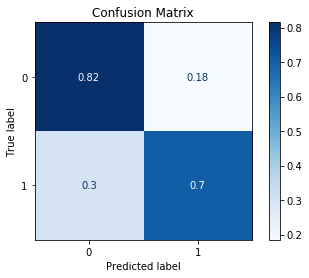

In [424]:
model_predict_test(dt_final,X_test_pca,y_test,'DecisionTree_final',5)

In [425]:
# Print score data
model_score_df

,Model_Name,ROC_AUC_SCORE,Accuracy,Precision,Recall,F1_Score
1,LogisticRegression,0.896,0.846,0.311,0.805,0.449
2,LogisticRegression_balanced,0.896,0.846,0.311,0.805,0.449
3,LogisticRegression_Final,0.831,0.866,0.343,0.791,0.478
4,DecisionTree_base,0.741,0.642,0.142,0.715,0.237
5,DecisionTree_final,0.825,0.806,0.243,0.703,0.361


#### 9.5.4 Random Forest

In [426]:
def plotTrainTestAccScore(score,param):
    scores = score
    # plotting accuracies with max_depth
    plt.figure()
    plt.plot(scores["param_"+param], 
    scores["mean_train_score"], 
    label="training accuracy")
    plt.plot(scores["param_"+param], 
    scores["mean_test_score"], 
    label="test accuracy")
    plt.xlabel(param)
    plt.ylabel("f1")
    plt.legend()
    plt.show()

#### Tuning max_depth

Accuracy : 0.9959501557632399
Precision : 0.9919653893695921
Recall : 1.0
F1 Score : 0.9959664908470369
Roc_auc_score : 0.9999667742829444
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     19260
           1       0.99      1.00      1.00     19260

    accuracy                           1.00     38520
   macro avg       1.00      1.00      1.00     38520
weighted avg       1.00      1.00      1.00     38520



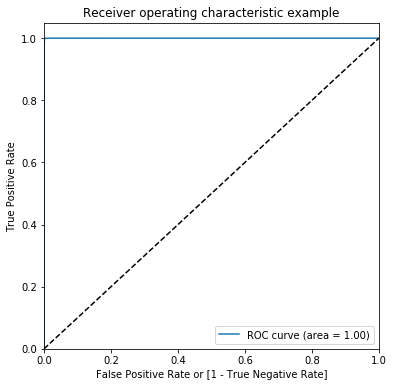

[0.         0.         0.         ... 0.94044652 0.94106957 1.        ] [0.0000000e+00 4.1536864e-04 4.6728972e-04 ... 1.0000000e+00 1.0000000e+00
 1.0000000e+00] [2.00000000e+00 1.00000000e+00 9.99952607e-01 ... 6.71140940e-05
 5.12820513e-05 0.00000000e+00]


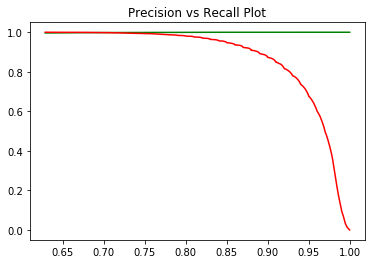

array([0.99637869, 0.9963785 , 0.99643005, ..., 1.        , 1.        ,
       1.        ])

array([1.00000000e+00, 9.99948079e-01, 9.99948079e-01, ...,
       4.67289720e-04, 4.15368640e-04, 0.00000000e+00])

array([0.62893055, 0.62931867, 0.63      , ..., 0.99992   , 0.99995261,
       1.        ])

In [428]:
# Start with base model and Tune Max Depth
parameters = {'max_depth': range(10, 30, 5)}
rf0 = RandomForestClassifier(class_weight='balanced',random_state=42)
rfgs1 = GridSearchCV(rf0, parameters, 
                    cv=5,
                   scoring="roc_auc",
                   return_train_score=True, n_jobs=-1)
model_fit_train(rfgs1,X_train_pca,y_train_res)

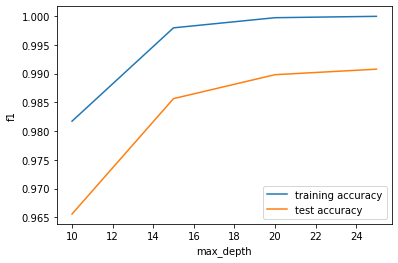

In [431]:
scores = rfgs1.cv_results_

#plotting accuracies with max_depth

plotTrainTestAccScore(rfgs1.cv_results_,'max_depth')

Test f1-score almost becomes constant after **max_depth=15**

#### Tuning n_estimators

In [432]:
parameters = {'n_estimators': range(50, 150, 25)}
rf1 = RandomForestClassifier(class_weight='balanced',max_depth=15,random_state=42)
rfgs1 = GridSearchCV(rf1, parameters, 
                    cv=3, 
                   scoring="roc_auc", return_train_score=True, n_jobs = -1)

Accuracy : 0.984190031152648
Precision : 0.9707708617295169
Recall : 0.9984423676012462
F1 Score : 0.9844121938109498
Roc_auc_score : 0.9978144487253725
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     19260
           1       0.97      1.00      0.98     19260

    accuracy                           0.98     38520
   macro avg       0.98      0.98      0.98     38520
weighted avg       0.98      0.98      0.98     38520



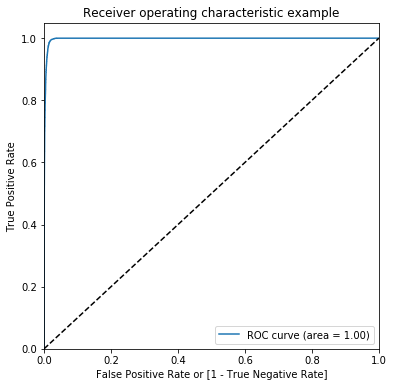

[0.         0.         0.         ... 0.99989616 0.99994808 1.        ] [0.0000000e+00 5.1921080e-05 1.0384216e-04 ... 1.0000000e+00 1.0000000e+00
 1.0000000e+00] [1.99190263e+00 9.91902629e-01 9.88425852e-01 ... 4.71993665e-04
 4.69115883e-04 4.40151597e-04]


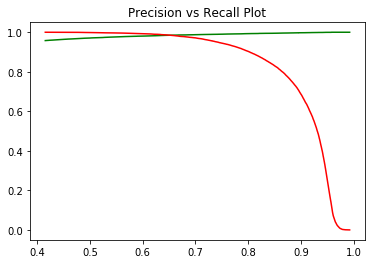

array([0.9577801 , 0.957778  , 0.95782563, ..., 1.        , 1.        ,
       1.        ])

array([1.00000000e+00, 9.99948079e-01, 9.99948079e-01, ...,
       1.03842160e-04, 5.19210800e-05, 0.00000000e+00])

array([0.41567037, 0.41601665, 0.41610906, ..., 0.98819888, 0.98842585,
       0.99190263])

In [433]:
model_fit_train(rfgs1,X_train_pca,y_train_res)

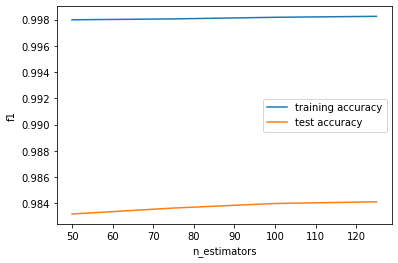

In [434]:
plotTrainTestAccScore(rfgs1.cv_results_,'n_estimators')

Selecting n_estimators = 100

#### Tuning max_features

In [435]:
parameters = {'max_features': [4, 8, 14, 20, 24]}
rf2 = RandomForestClassifier(class_weight='balanced',max_depth=15,n_estimators=100,random_state=42)
rfgs2 = GridSearchCV(rf2, parameters, 
                    cv=5, 
                   scoring="roc_auc", return_train_score=True, n_jobs = -1)

Accuracy : 0.9856178608515057
Precision : 0.9729470064724919
Recall : 0.9990134994807892
F1 Score : 0.9858079721282917
Roc_auc_score : 0.9980706520274023
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     19260
           1       0.97      1.00      0.99     19260

    accuracy                           0.99     38520
   macro avg       0.99      0.99      0.99     38520
weighted avg       0.99      0.99      0.99     38520



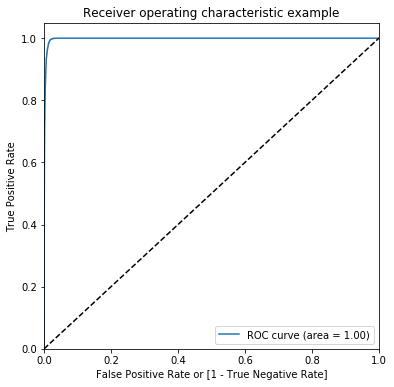

[0.         0.         0.         ... 0.99984424 0.99989616 1.        ] [0.0000000e+00 5.1921080e-05 1.5576324e-04 ... 1.0000000e+00 1.0000000e+00
 1.0000000e+00] [1.99734362e+00 9.97343622e-01 9.91721307e-01 ... 1.76861397e-04
 7.06063119e-05 0.00000000e+00]


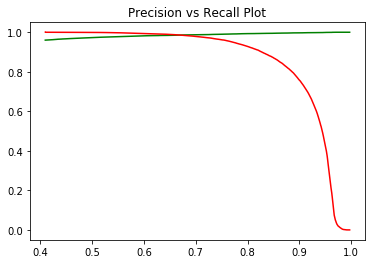

array([0.96011964, 0.96011765, 0.96016552, ..., 1.        , 1.        ,
       1.        ])

array([1.00000000e+00, 9.99948079e-01, 9.99948079e-01, ...,
       1.55763240e-04, 5.19210800e-05, 0.00000000e+00])

array([0.40937061, 0.40937202, 0.40973768, ..., 0.990427  , 0.99172131,
       0.99734362])

In [436]:
model_fit_train(rfgs2,X_train_pca,y_train_res)

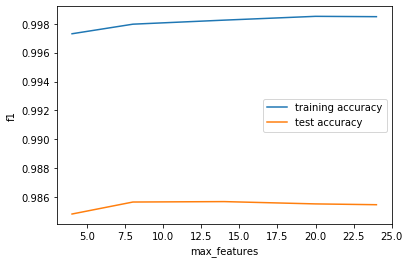

In [437]:
plotTrainTestAccScore(rfgs2.cv_results_,'max_features')

Selecting max_features = 8

#### Tuning min_sample_leaf

In [438]:
parameters = {'min_samples_leaf': range(100, 400, 100)}
rf3 = RandomForestClassifier(class_weight='balanced',max_depth=15,n_estimators=100,max_features=8,random_state=42)
rfgs3 = GridSearchCV(rf3, parameters, 
                    cv=3, 
                   scoring="roc_auc", return_train_score=True, n_jobs = -1)

Accuracy : 0.8840083073727933
Precision : 0.9052602739726028
Recall : 0.8577881619937695
F1 Score : 0.8808850973073847
Roc_auc_score : 0.9559299642321448
              precision    recall  f1-score   support

           0       0.86      0.91      0.89     19260
           1       0.91      0.86      0.88     19260

    accuracy                           0.88     38520
   macro avg       0.89      0.88      0.88     38520
weighted avg       0.89      0.88      0.88     38520



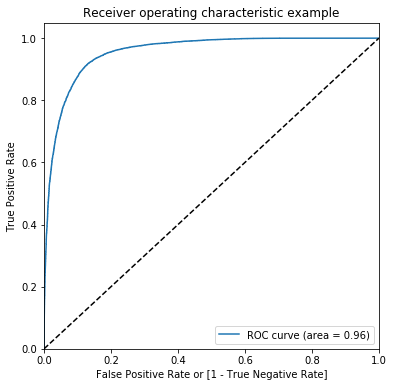

[0.         0.         0.         ... 0.99989616 0.99994808 1.        ] [0.0000000e+00 5.1921080e-05 1.0384216e-04 ... 1.0000000e+00 1.0000000e+00
 1.0000000e+00] [1.98123587 0.98123587 0.98095618 ... 0.03891518 0.03680978 0.03627777]


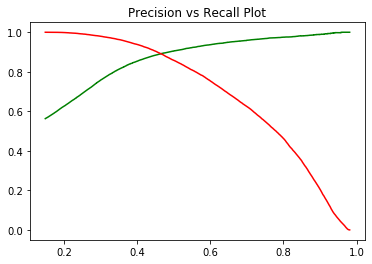

array([0.56294391, 0.56293114, 0.56294759, ..., 1.        , 1.        ,
       1.        ])

array([1.00000000e+00, 9.99948079e-01, 9.99948079e-01, ...,
       1.03842160e-04, 5.19210800e-05, 0.00000000e+00])

array([0.14849828, 0.14850423, 0.14851205, ..., 0.98093704, 0.98095618,
       0.98123587])

In [439]:
model_fit_train(rfgs3,X_train_pca,y_train_res)

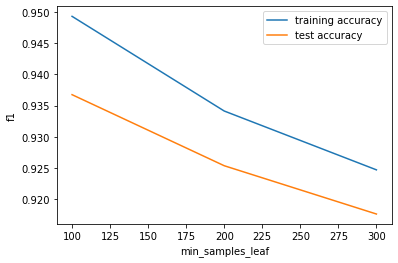

In [440]:
plotTrainTestAccScore(rfgs3.cv_results_,'min_samples_leaf')

Selecting min_sample_leaf = 100

#### Tuning min_sample_split

In [442]:
parameters = {'min_samples_split': range(50, 300, 50)}
rf4 = RandomForestClassifier(class_weight='balanced',max_depth=15,n_estimators=100,max_features=8,min_samples_leaf=100,random_state=42)
rfgs4 = GridSearchCV(rf4, parameters, 
                    cv=3, 
                   scoring="roc_auc", return_train_score=True, n_jobs = -1)

Accuracy : 0.8840083073727933
Precision : 0.9052602739726028
Recall : 0.8577881619937695
F1 Score : 0.8808850973073847
Roc_auc_score : 0.9559299642321448
              precision    recall  f1-score   support

           0       0.86      0.91      0.89     19260
           1       0.91      0.86      0.88     19260

    accuracy                           0.88     38520
   macro avg       0.89      0.88      0.88     38520
weighted avg       0.89      0.88      0.88     38520



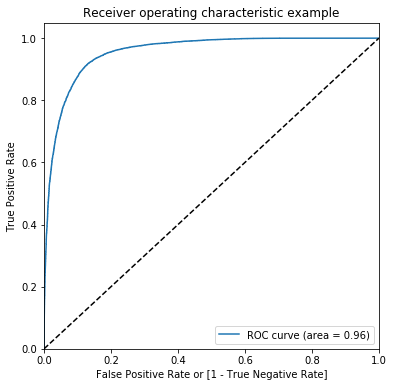

[0.         0.         0.         ... 0.99989616 0.99994808 1.        ] [0.0000000e+00 5.1921080e-05 1.0384216e-04 ... 1.0000000e+00 1.0000000e+00
 1.0000000e+00] [1.98123587 0.98123587 0.98095618 ... 0.03891518 0.03680978 0.03627777]


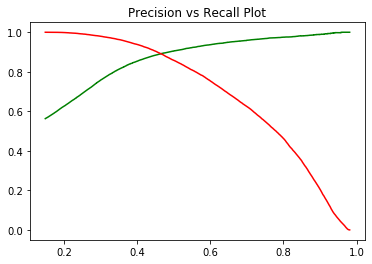

array([0.56294391, 0.56293114, 0.56294759, ..., 1.        , 1.        ,
       1.        ])

array([1.00000000e+00, 9.99948079e-01, 9.99948079e-01, ...,
       1.03842160e-04, 5.19210800e-05, 0.00000000e+00])

array([0.14849828, 0.14850423, 0.14851205, ..., 0.98093704, 0.98095618,
       0.98123587])

In [443]:
model_fit_train(rfgs4,X_train_pca,y_train_res)

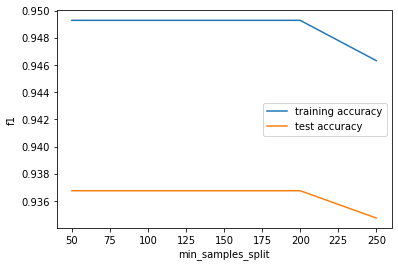

In [444]:
plotTrainTestAccScore(rfgs4.cv_results_,'min_samples_split')

Selecting min_sample_split = 50

#### Tunned Random Forest

In [445]:
rf_final = RandomForestClassifier(class_weight='balanced',max_depth=15,
                                  n_estimators=100,
                                  max_features=8,
                                  min_samples_leaf=100,
                                  min_samples_split=50,
                                  random_state=42,
                                  n_jobs=-1)

Accuracy : 0.8840083073727933
Precision : 0.9052602739726028
Recall : 0.8577881619937695
F1 Score : 0.8808850973073847
Roc_auc_score : 0.9559299642321448
              precision    recall  f1-score   support

           0       0.86      0.91      0.89     19260
           1       0.91      0.86      0.88     19260

    accuracy                           0.88     38520
   macro avg       0.89      0.88      0.88     38520
weighted avg       0.89      0.88      0.88     38520



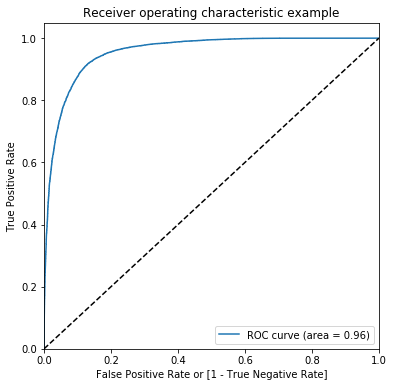

[0.         0.         0.         ... 0.99989616 0.99994808 1.        ] [0.0000000e+00 5.1921080e-05 1.0384216e-04 ... 1.0000000e+00 1.0000000e+00
 1.0000000e+00] [1.98123587 0.98123587 0.98095618 ... 0.03891518 0.03680978 0.03627777]


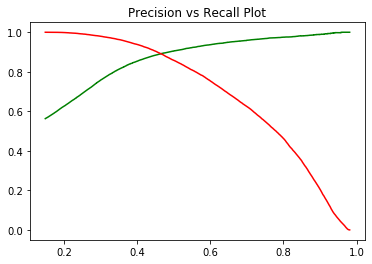

array([0.56294391, 0.56293114, 0.56294759, ..., 1.        , 1.        ,
       1.        ])

array([1.00000000e+00, 9.99948079e-01, 9.99948079e-01, ...,
       1.03842160e-04, 5.19210800e-05, 0.00000000e+00])

array([0.14849828, 0.14850423, 0.14851205, ..., 0.98093704, 0.98095618,
       0.98123587])

In [446]:
model_fit_train(rf_final,X_train_pca,y_train_res)

Accuracy : 0.8802355293856238
Precision : 0.3621068032187271
Recall : 0.7061340941512125
F1 Score : 0.4787234042553192
Roc_auc_score : 0.8832930581097571
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      8300
           1       0.36      0.71      0.48       701

    accuracy                           0.88      9001
   macro avg       0.67      0.80      0.71      9001
weighted avg       0.93      0.88      0.90      9001



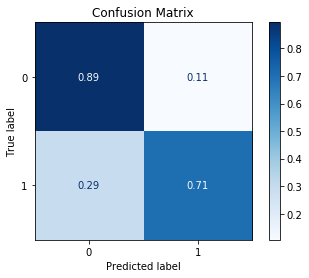

In [447]:
model_predict_test(rf_final,X_test_pca,y_test,'RandomForest_final',6)

In [449]:
# Print Score Data
model_score_df

,Model_Name,ROC_AUC_SCORE,Accuracy,Precision,Recall,F1_Score
1,LogisticRegression,0.896,0.846,0.311,0.805,0.449
2,LogisticRegression_balanced,0.896,0.846,0.311,0.805,0.449
3,LogisticRegression_Final,0.831,0.866,0.343,0.791,0.478
4,DecisionTree_base,0.741,0.642,0.142,0.715,0.237
5,DecisionTree_final,0.825,0.806,0.243,0.703,0.361
6,RandomForest_final,0.883,0.880,0.362,0.706,0.479


#### 9.5.5 Boosting models

###### Gradiant boosting Classifier

Applying Gradiant boosting Classifier on our principal components with Hyperparameter tuning

Accuracy : 0.879932502596054
Precision : 0.8811793509402511
Recall : 0.8782969885773624
F1 Score : 0.8797358088254414
Roc_auc_score : 0.9466924088469638
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     19260
           1       0.88      0.88      0.88     19260

    accuracy                           0.88     38520
   macro avg       0.88      0.88      0.88     38520
weighted avg       0.88      0.88      0.88     38520



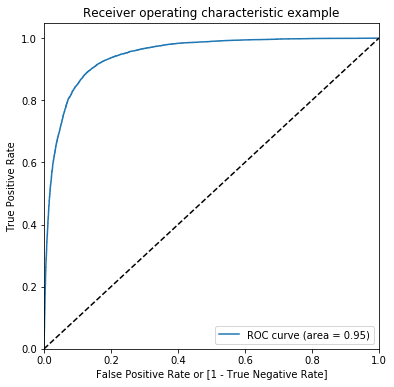

[0.         0.         0.         ... 0.99989616 0.99994808 1.        ] [0.0000000e+00 1.0384216e-04 1.5576324e-04 ... 1.0000000e+00 1.0000000e+00
 1.0000000e+00] [1.97963409 0.97963409 0.97775171 ... 0.00645966 0.00570263 0.00389133]


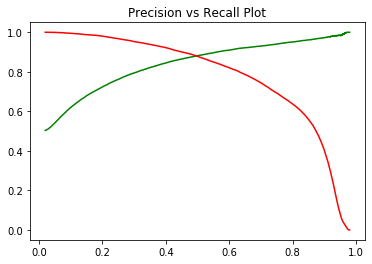

array([0.50345044, 0.50343746, 0.50345062, ..., 1.        , 1.        ,
       1.        ])

array([1.00000000e+00, 9.99948079e-01, 9.99948079e-01, ...,
       1.55763240e-04, 1.03842160e-04, 0.00000000e+00])

array([0.0201418 , 0.02015867, 0.02016639, ..., 0.9774605 , 0.97775171,
       0.97963409])

In [507]:
# Fitting the default GradientBoostingClassifier
gbm0 = GradientBoostingClassifier(random_state=42)
model_fit_train(gbm0, X_train_pca, y_train_res)

We will use the following hyperparameters to tune the model:

**Tree-Specific Parameters:**
 - min_samples_split
 - min_samples_leaf
 - max_depth
 - max_features

**Boosting Parameters:**
 - learning_rate
 - n_estimators
 - subsample

**n_estimators**

In [509]:
# Hyperparameter tuning for n_estimators
param_test1 = {'n_estimators':range(20,150,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=-1,iid=False, cv=3,verbose=1)
gsearch1.fit(X_train_pca, y_train_res)

Fitting 3 folds for each of 13 candidates, totalling 39 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:  3.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=8,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=50,
                                                  min_samples_split=500,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
    

In [510]:
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 140}, 0.9762694461427976)

**max_depth** and **min_samples_split**

In [511]:
# Hyperparameter tuning for max_depth and min_sample_split
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=140, max_features='sqrt', subsample=0.8, random_state=42), 
param_grid = param_test2, scoring='roc_auc',n_jobs=-1,iid=False, cv=3,verbose=1)
gsearch2.fit(X_train_pca, y_train_res)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 14.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=140,
                                                  n_iter_no_change=None,
       

In [512]:
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 15, 'min_samples_split': 200}, 0.9907154676293901)

**min_samples_leaf**

In [513]:
# Hyperparameter tuning for min_samples_leaf
param_test3 = {'min_samples_leaf':range(30,71,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=140,max_depth=15,min_samples_split=200, max_features='sqrt', subsample=0.8, random_state=42), 
param_grid = param_test3, scoring='roc_auc',n_jobs=-1,iid=False, cv=3,verbose=1)
gsearch3.fit(X_train_pca, y_train_res)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  2.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=15,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=200,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=140,
                                                  n_iter_no_change=None,
    

In [514]:
gsearch3.best_params_, gsearch3.best_score_

({'min_samples_leaf': 30}, 0.9906469512135945)

**max_features**

In [515]:
# Hyperparameter tuning for max_features
param_test4 = {'max_features':range(7,20,2)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=140,max_depth=15, min_samples_split=200, min_samples_leaf=30, subsample=0.8, random_state=42),
param_grid = param_test4, scoring='roc_auc',n_jobs=-1,iid=False, cv=3, verbose=1)
gsearch4.fit(X_train_pca, y_train_res)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:  8.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=15,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=30,
                                                  min_samples_split=200,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=140,
                                                  n_iter_no_change=None,
     

In [516]:
gsearch4.best_params_, gsearch4.best_score_

({'max_features': 17}, 0.9916592828744545)

**Tunned GradientBoostingClassifier**

Accuracy : 1.0
Precision : 1.0
Recall : 1.0
F1 Score : 1.0
Roc_auc_score : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19260
           1       1.00      1.00      1.00     19260

    accuracy                           1.00     38520
   macro avg       1.00      1.00      1.00     38520
weighted avg       1.00      1.00      1.00     38520



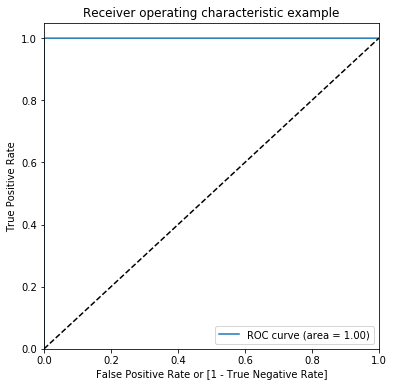

[0.         0.         0.         ... 0.99989616 0.99994808 1.        ] [0.0000000e+00 5.1921080e-05 1.0384216e-04 ... 1.0000000e+00 1.0000000e+00
 1.0000000e+00] [1.99980767e+00 9.99807675e-01 9.99761071e-01 ... 9.89798804e-05
 6.73747612e-05 5.98579974e-05]


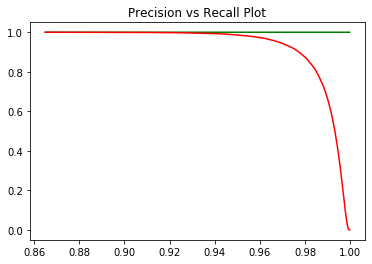

array([1., 1., 1., ..., 1., 1., 1.])

array([1.00000000e+00, 9.99948079e-01, 9.99896158e-01, ...,
       1.03842160e-04, 5.19210800e-05, 0.00000000e+00])

array([0.86489806, 0.87056416, 0.87468321, ..., 0.9997537 , 0.99976107,
       0.99980767])

In [517]:
# Tunned GradientBoostingClassifier
gbm_final = GradientBoostingClassifier(learning_rate=0.1, n_estimators=140,max_features=17,max_depth=15, min_samples_split=200, min_samples_leaf=30, subsample=0.8, random_state=42)
model_fit_train(gbm_final, X_train_pca, y_train_res)

Accuracy : 0.9223419620042218
Precision : 0.5012224938875306
Recall : 0.5848787446504993
F1 Score : 0.5398288347597102
Roc_auc_score : 0.8981169757489301
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      8300
           1       0.50      0.58      0.54       701

    accuracy                           0.92      9001
   macro avg       0.73      0.77      0.75      9001
weighted avg       0.93      0.92      0.93      9001



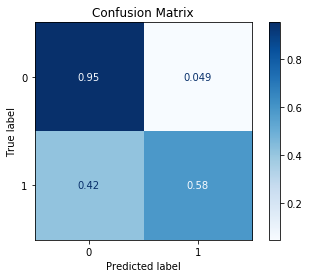

In [518]:
model_predict_test(gbm_final,X_test_pca,y_test,'GradientBoosting',7)

In [520]:
model_score_df.head(10)

,Model_Name,ROC_AUC_SCORE,Accuracy,Precision,Recall,F1_Score
1,LogisticRegression,0.896,0.846,0.311,0.805,0.449
2,LogisticRegression_balanced,0.896,0.846,0.311,0.805,0.449
3,LogisticRegression_Final,0.831,0.866,0.343,0.791,0.478
4,DecisionTree_base,0.741,0.642,0.142,0.715,0.237
5,DecisionTree_final,0.825,0.806,0.243,0.703,0.361
6,RandomForest_final,0.883,0.880,0.362,0.706,0.479
7,GradientBoosting,0.898,0.922,0.501,0.585,0.540


#### 9.5.6 XGBoost Classifier

Applying XGBoost Classifier on our principal components with Hyperparameter tuning

In [521]:
# Start with the base model
xgb1 = XGBClassifier(learning_rate =0.1,
                    n_estimators=250,
                    max_depth=5,
                    min_child_weight=1,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective= 'binary:logistic',
                    nthread=4,
                    n_jobs=-1,
                    scale_pos_weight=1,
                    seed=27)

Accuracy : 0.9723260643821392
Precision : 0.9598625012637751
Recall : 0.985877466251298
F1 Score : 0.9726960708980074
Roc_auc_score : 0.9952963720482354
              precision    recall  f1-score   support

           0       0.99      0.96      0.97     19260
           1       0.96      0.99      0.97     19260

    accuracy                           0.97     38520
   macro avg       0.97      0.97      0.97     38520
weighted avg       0.97      0.97      0.97     38520



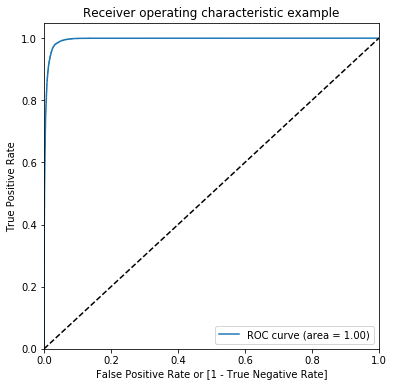

[0.         0.         0.         ... 0.99989616 0.99994808 1.        ] [0.0000000e+00 5.1921080e-05 1.0384216e-04 ... 1.0000000e+00 1.0000000e+00
 1.0000000e+00] [1.9987559e+00 9.9875593e-01 9.9869931e-01 ... 4.9050588e-05 3.8495513e-05
 3.6382167e-05]


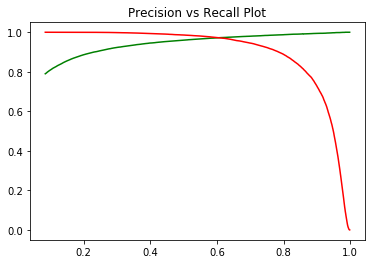

array([0.7899918 , 0.78998318, 0.79001559, ..., 1.        , 1.        ,
       1.        ])

array([1.00000000e+00, 9.99948079e-01, 9.99948079e-01, ...,
       1.03842160e-04, 5.19210800e-05, 0.00000000e+00])

array([0.08432788, 0.08435038, 0.08437997, ..., 0.998524  , 0.9986993 ,
       0.99875593], dtype=float32)

In [522]:
# Model fit and performance on Train data
model_fit_train(xgb1, X_train_pca, y_train_res)

In [523]:
# Hyperparameter tunning for the XGBClassifer
param_test1 = {'max_depth':range(3,10,2),'min_child_weight':range(1,6,2)}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
             min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
             objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
             param_grid = param_test1, scoring='roc_auc',n_jobs=-1,iid=False, cv=3, verbose=1)

gsearch1.fit(X_train_pca, y_train_res)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  7.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=5, min_child_weight=1,
                                     missing=None, n_estimators=140, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, silent=None,
                                     subsample=0.8, verbosity=1),
             iid=False, n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=F

In [524]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 9, 'min_child_weight': 1}, 0.9909549637199432)

In [525]:
# Some more hyperparameter tunning for the XGBClassifer
param_test2 = param_test3 = {'gamma':[i/10.0 for i in range(0,5)]}

gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=9,
             min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
             objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
             param_grid = param_test2, scoring='roc_auc',n_jobs=-1,iid=False, cv=3, verbose=1)

gsearch2.fit(X_train_pca, y_train_res)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  4.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=9, min_child_weight=1,
                                     missing=None, n_estimators=140, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, silent=None,
                                     subsample=0.8, verbosity=1),
             iid=False, n_jobs=-1,
             param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=1)

In [526]:
gsearch2.best_params_, gsearch2.best_score_

({'gamma': 0.0}, 0.9909549637199432)

In [527]:
# Final XGBClassifier
xgb_final = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=9,
         min_child_weight=1, gamma=0.0, subsample=0.8, colsample_bytree=0.8,
         objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27,verbose=1)

Accuracy : 0.99966251298027
Precision : 0.99932548124319
Recall : 1.0
F1 Score : 0.9996626268393325
Roc_auc_score : 0.9999999784336117
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19260
           1       1.00      1.00      1.00     19260

    accuracy                           1.00     38520
   macro avg       1.00      1.00      1.00     38520
weighted avg       1.00      1.00      1.00     38520



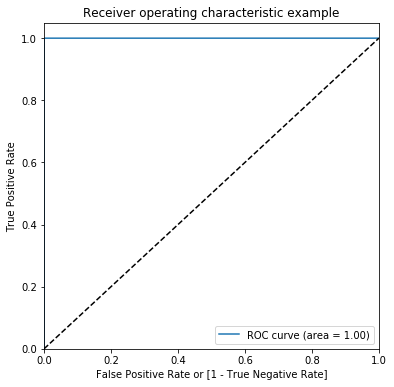

[0.         0.         0.         ... 0.99989616 0.99994808 1.        ] [0.0000000e+00 5.1921080e-05 1.0384216e-04 ... 1.0000000e+00 1.0000000e+00
 1.0000000e+00] [1.9994364e+00 9.9943644e-01 9.9936372e-01 ... 8.0994432e-05 6.0233870e-05
 5.1836018e-05]


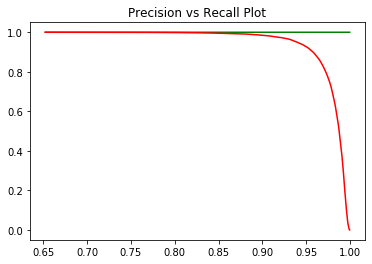

array([0.99989617, 0.99989616, 0.99989616, ..., 1.        , 1.        ,
       1.        ])

array([1.00000000e+00, 9.99948079e-01, 9.99896158e-01, ...,
       1.03842160e-04, 5.19210800e-05, 0.00000000e+00])

array([0.65236616, 0.6802374 , 0.6863137 , ..., 0.9993205 , 0.9993637 ,
       0.99943644], dtype=float32)

In [528]:
# Fit Train data
model_fit_train(xgb_final, X_train_pca, y_train_res)

Accuracy : 0.9178980113320742
Precision : 0.478310502283105
Recall : 0.5977175463623395
F1 Score : 0.5313887127457197
Roc_auc_score : 0.8945301892305312
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      8300
           1       0.48      0.60      0.53       701

    accuracy                           0.92      9001
   macro avg       0.72      0.77      0.74      9001
weighted avg       0.93      0.92      0.92      9001



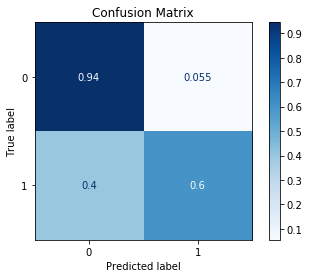

In [531]:
model_predict_test(xgb_final,X_test_pca,y_test,'XGBoost','8')

### Final Model Selection

Let's compare the performance metrics across all the models:

Get the training scores into a DataFrame for comparison.

In [536]:
model_train_score_df=pd.DataFrame(columns=model_score_df.columns)

In [544]:
model_train_score_df.loc['1']= ['LogisticRegression','0.926','0.862','0.856','0.869','0.863']
model_train_score_df.loc['2']= ['LogisticRegression_balanced','0.926','0.862','0.856','0.869','0.863']
model_train_score_df.loc['3']= ['LogisticRegression_Final','0.861','0.861','0.872','0.846','0.859']
model_train_score_df.loc['4']= ['DecisionTree_final','0.926','0.842','0.836','0.85','0.843']
model_train_score_df.loc['5']= ['RandomForest_final','0.956','0.884','0.905','0.858','0.881']
model_train_score_df.loc['6']= ['GradientBoosting','1','1','1','1','1']
model_train_score_df.loc['7']= ['XGBoost','1','1','0.999','1','1']

**Train scores across models**

In [546]:
# Print Train Score
model_train_score_df.head(10)

,Model_Name,ROC_AUC_SCORE,Accuracy,Precision,Recall,F1_Score
1,LogisticRegression,0.926,0.862,0.856,0.869,0.863
2,LogisticRegression_balanced,0.926,0.862,0.856,0.869,0.863
3,LogisticRegression_Final,0.861,0.861,0.872,0.846,0.859
4,DecisionTree_final,0.926,0.842,0.836,0.85,0.843
5,RandomForest_final,0.956,0.884,0.905,0.858,0.881
6,GradientBoosting,1,1,1,1,1
7,XGBoost,1,1,0.999,1,1


**Test Scores across models**

In [547]:
# Print Test Score
model_score_df.head(10)

,Model_Name,ROC_AUC_SCORE,Accuracy,Precision,Recall,F1_Score
1,LogisticRegression,0.896,0.846,0.311,0.805,0.449
2,LogisticRegression_balanced,0.896,0.846,0.311,0.805,0.449
3,LogisticRegression_Final,0.831,0.866,0.343,0.791,0.478
4,DecisionTree_base,0.741,0.642,0.142,0.715,0.237
5,DecisionTree_final,0.825,0.806,0.243,0.703,0.361
6,RandomForest_final,0.883,0.880,0.362,0.706,0.479
7,GradientBoosting,0.898,0.922,0.501,0.585,0.540
8,XGBoost,0.895,0.918,0.478,0.598,0.531


On comparison between the train and test scores of the tuned models, we can observe that:
1. Gradient and XGBoosting provides best test scores, however, they overfit on train dataset and have a significant difference in performance between train and test score, hence overfitting.
2. In the remaining other 2 tree models, Random Forest results better ROC_AUC and F1_Score over Decision tree. Also Random Forest Model result is consistent compared to it's train results.
3. Logistic Regression on the other hand, although has a similar performance compared to Random Forest, has lower ROC_AUC score compared to Random Forest. Random Forest also has a better balance between Precision and recall compared to Logistic Regression.

So from the above insights, we are selecting **Random Forest (with PCA) as our Final Model** from the Tree Models. However, Logistic Regression can also be a good model choice in this scenario.

### 10. Derive Features for Churn Prediction 

We will use Random Forest to derive the key predictors. This will be done on **resmapled data only i.e. without PCA**.

In [548]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(10, 25, 5),
    'n_estimators': [100,150,200],
    'max_features': [12, 15, 20],
    'min_samples_leaf': range(100, 300, 100),
    'min_samples_split': range(100, 300, 100)
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced',random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, scoring="roc_auc", verbose = 1)

In [452]:
# Fit the grid search to the data
grid_search.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed: 48.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                            

In [453]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9676282741821217 using {'max_depth': 20, 'max_features': 20, 'min_samples_leaf': 100, 'min_samples_split': 100, 'n_estimators': 200}


In [454]:
# Initialize the final model with tuned hyperparameters
rf_fs_final = RandomForestClassifier(class_weight='balanced',max_depth=20,
                            max_features=20,
                            min_samples_leaf=100,
                            min_samples_split=100,
                            n_estimators=200,
                            random_state=42)

Accuracy : 0.9179906542056074
Precision : 0.9177520626848633
Recall : 0.918276220145379
F1 Score : 0.9180140665957282
Roc_auc_score : 0.9759824703003874
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     19260
           1       0.92      0.92      0.92     19260

    accuracy                           0.92     38520
   macro avg       0.92      0.92      0.92     38520
weighted avg       0.92      0.92      0.92     38520



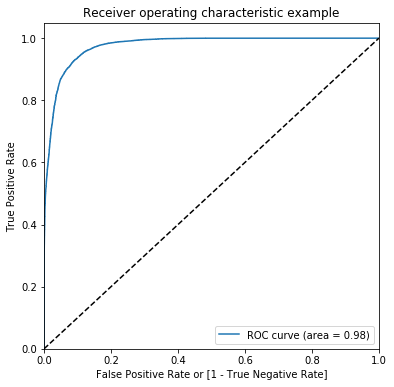

[0.         0.         0.         ... 0.99989616 0.99994808 1.        ] [0.0000000e+00 5.1921080e-05 1.0384216e-04 ... 1.0000000e+00 1.0000000e+00
 1.0000000e+00] [1.99912724e+00 9.99127244e-01 9.98819379e-01 ... 5.21635635e-04
 5.09935016e-04 3.92043729e-04]


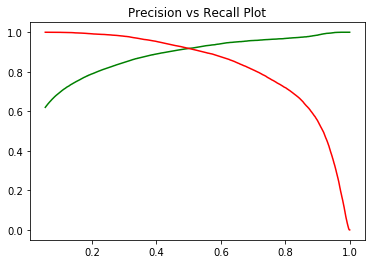

array([0.62003026, 0.62001803, 0.62003799, ..., 1.        , 1.        ,
       1.        ])

array([1.00000000e+00, 9.99948079e-01, 9.99948079e-01, ...,
       1.03842160e-04, 5.19210800e-05, 0.00000000e+00])

array([0.05563156, 0.05564689, 0.05564828, ..., 0.99871968, 0.99881938,
       0.99912724])

In [458]:
# Fit the model with train data
model_fit_train(rf_fs_final, X_train_res, y_train_res)

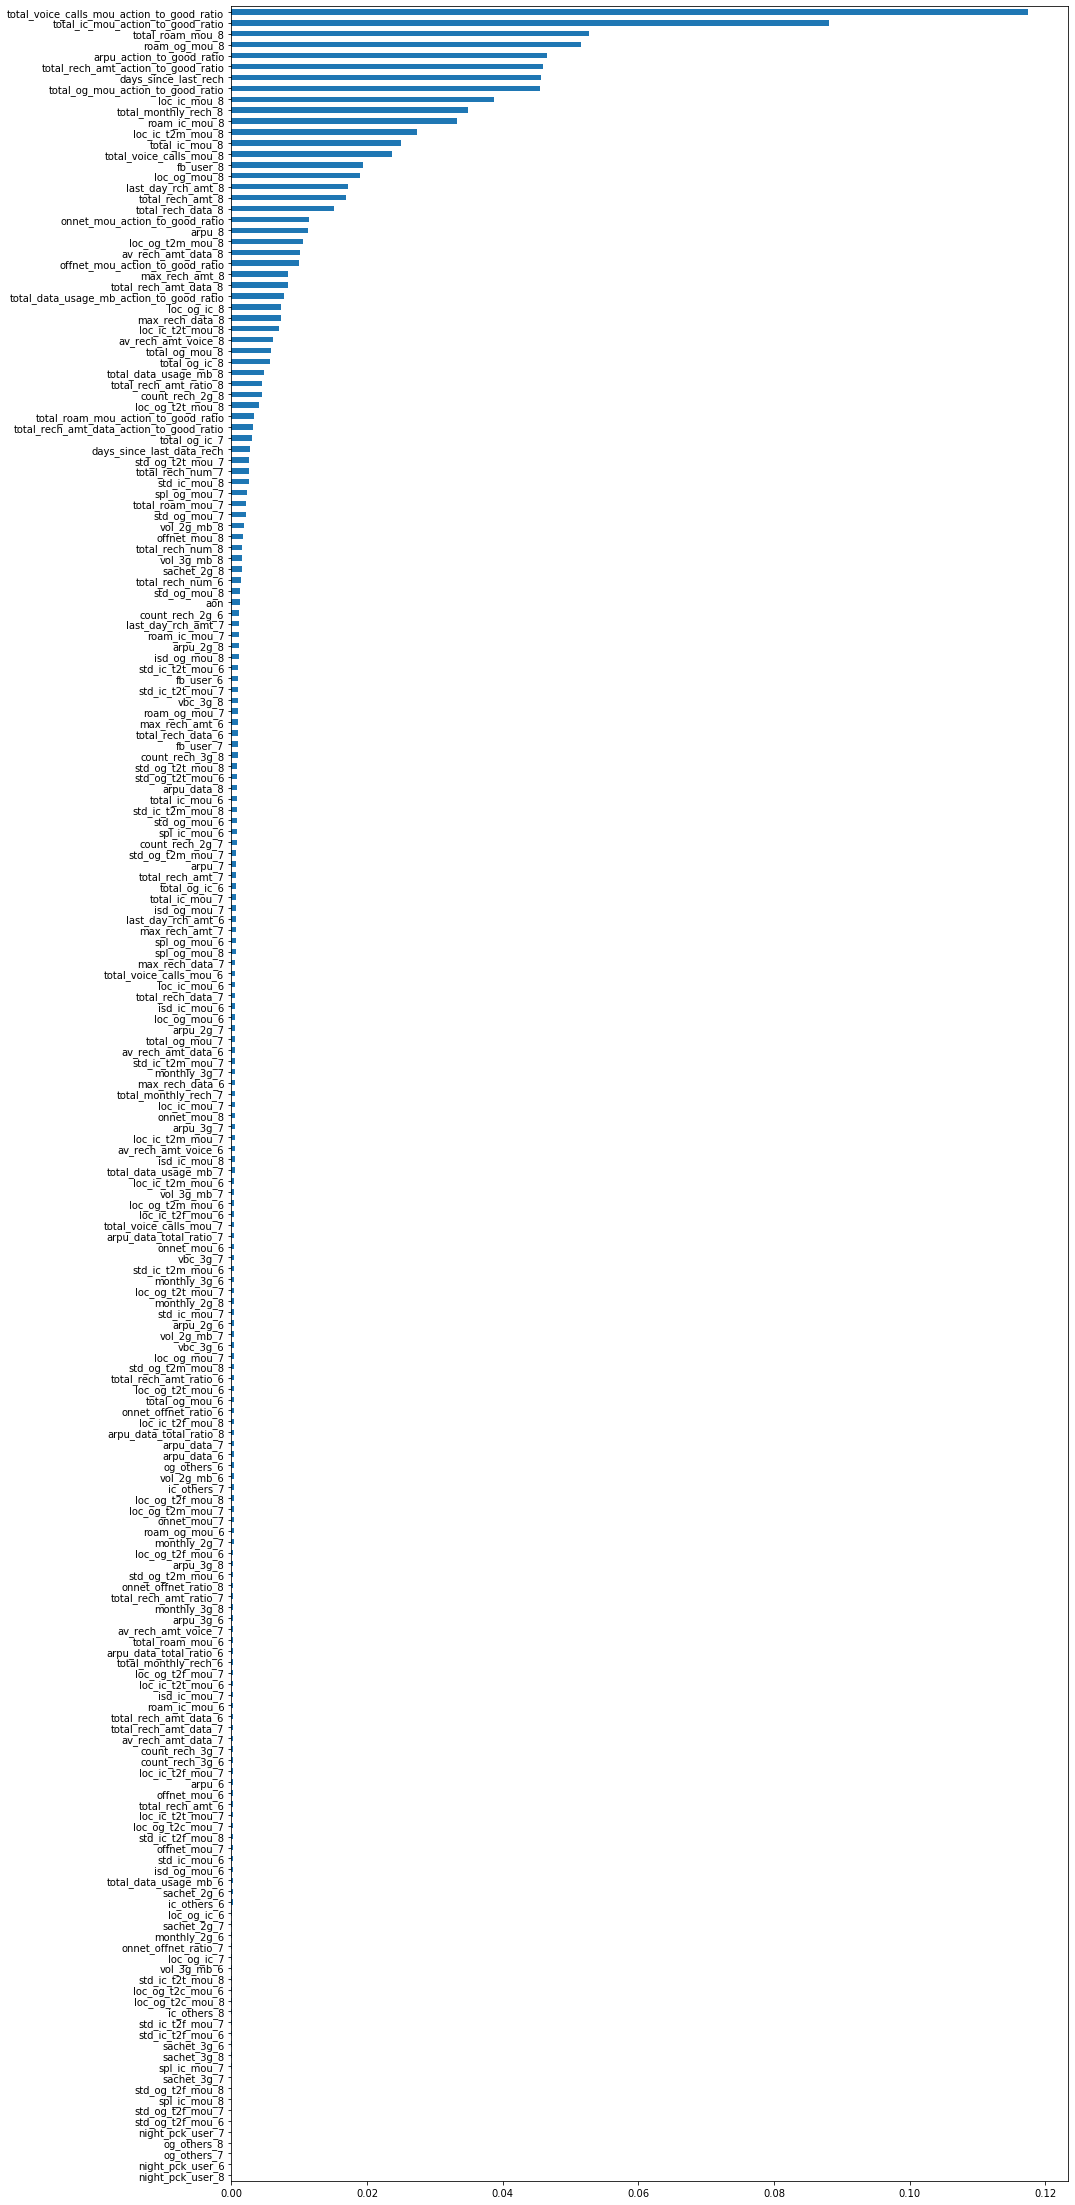

In [474]:
# Plot features by its relative improtance
plt.figure(figsize=(15,40))
feat_importances = pd.Series(rf_fs_final.feature_importances_, index=X.columns)
feat_importances.nlargest(len(X.columns)).sort_values().plot(kind='barh', align='center')

In [475]:
feat_importances.nlargest(len(X.columns))

total_voice_calls_mou_action_to_good_ratio    0.117505
total_ic_mou_action_to_good_ratio             0.088095
total_roam_mou_8                              0.052720
roam_og_mou_8                                 0.051494
arpu_action_to_good_ratio                     0.046558
total_rech_amt_action_to_good_ratio           0.045877
days_since_last_rech                          0.045696
total_og_mou_action_to_good_ratio             0.045507
loc_ic_mou_8                                  0.038745
total_monthly_rech_8                          0.034855
roam_ic_mou_8                                 0.033197
loc_ic_t2m_mou_8                              0.027381
total_ic_mou_8                                0.024940
total_voice_calls_mou_8                       0.023701
fb_user_8                                     0.019462
loc_og_mou_8                                  0.019026
last_day_rch_amt_8                            0.017230
total_rech_amt_8                              0.016905
total_rech

In [495]:
# Check correlation among the top 30 features
df_features = pd.DataFrame(feat_importances,columns=['score'])
df_features['feature_name']=df_features.index
cols=df_features.sort_values(by='score',ascending=False).head(30).index

df_feat=telecom[cols]

joincorr= df_feat.corr()
df_corr = joincorr.stack().reset_index().sort_values(by = 0, ascending = False)
df_corr = df_corr[((df_corr[0] >= 0.5) & (df_corr[0] < 1)) | ((df_corr[0] <= -0.5) & (df_corr[0] > -1))]
df_corr

,level_0,level_1,0
63,total_roam_mou_8,roam_og_mou_8,0.957752
92,roam_og_mou_8,total_roam_mou_8,0.957752
530,total_rech_amt_8,arpu_8,0.944497
617,arpu_8,total_rech_amt_8,0.944497
70,total_roam_mou_8,roam_ic_mou_8,0.916297
302,roam_ic_mou_8,total_roam_mou_8,0.916297
252,loc_ic_mou_8,total_ic_mou_8,0.896211
368,total_ic_mou_8,loc_ic_mou_8,0.896211
295,total_monthly_rech_8,total_rech_amt_data_8,0.889256
759,total_rech_amt_data_8,total_monthly_rech_8,0.889256


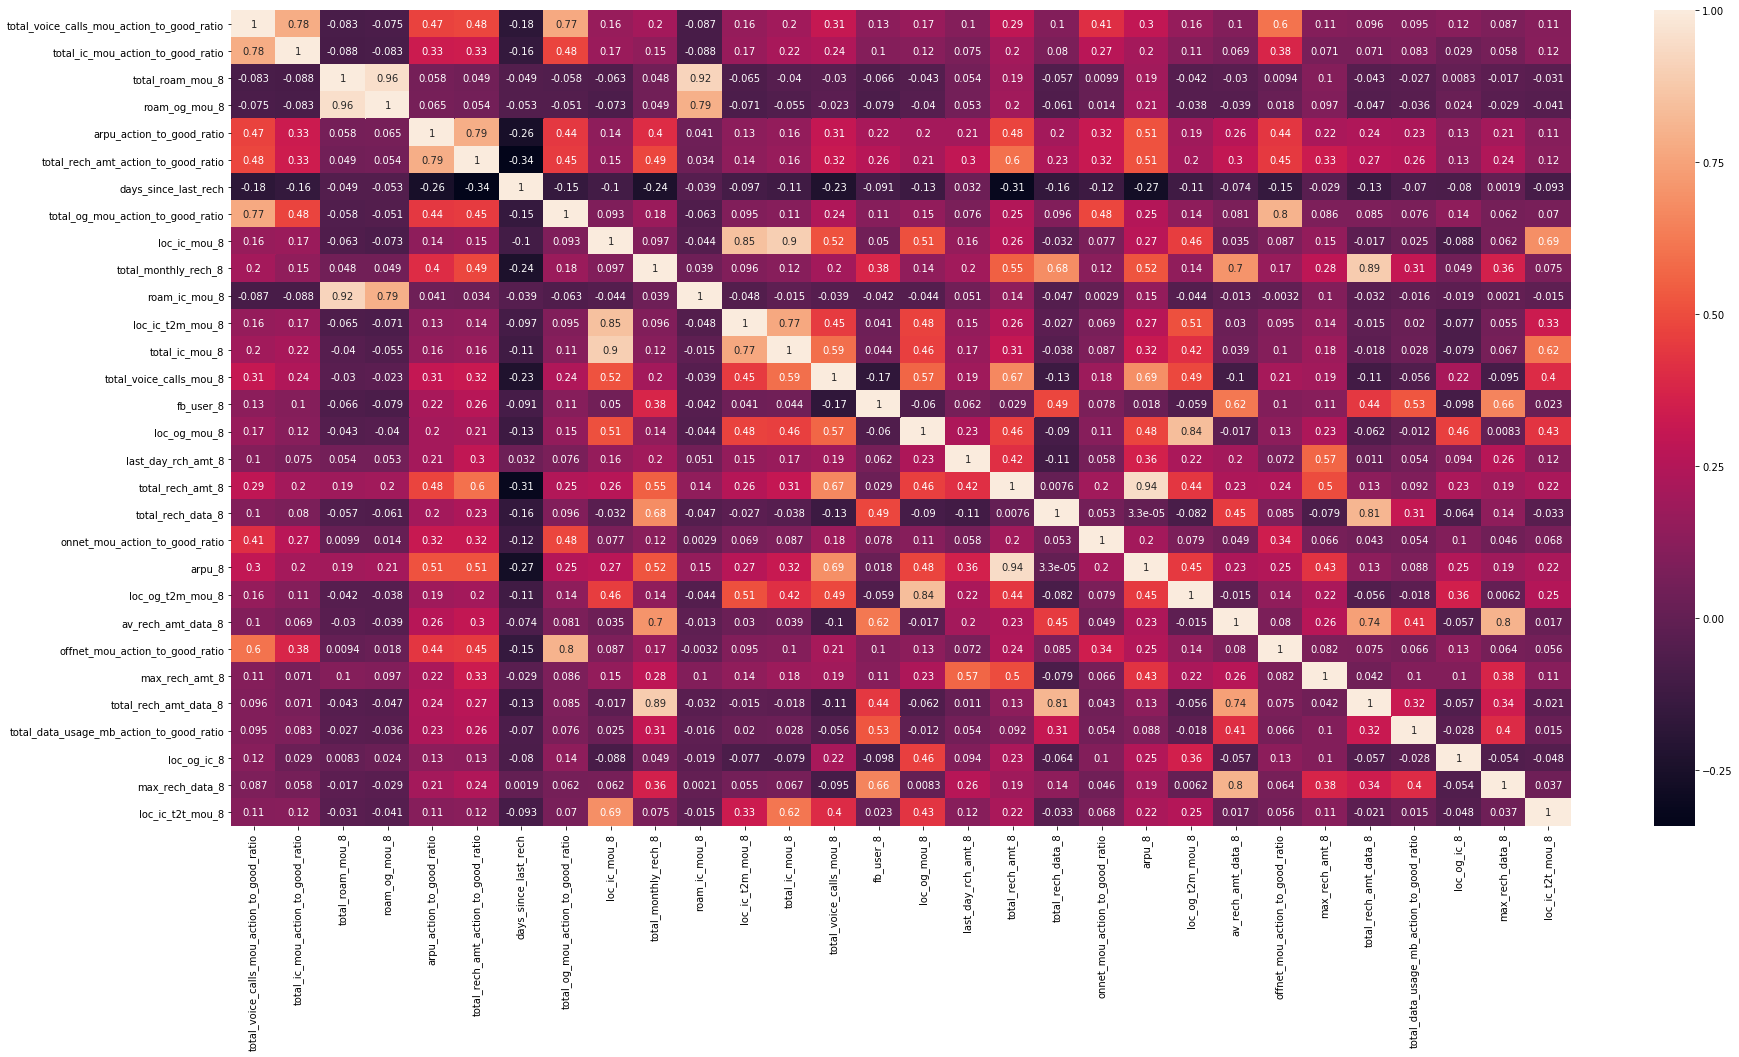

In [498]:
# Plot heatmap of top 30 features
plt.figure(figsize=(30,15))
sns.heatmap(df_feat.corr(),annot=True)

**Based upon the feature importance value, domain understanding and feature correlations we arrived at the below top 25 features:**

1. **total_voice_calls_mou_action_to_good_ratio:** Total minutes of usage ratio between action month to good month
2. **total_roam_mou_8:** Total roam minutes of usage in month 8
3. **arpu_action_to_good_ratio:** Average revenue per user ratio between action month to good month
4. **total_rech_amt_action_to_good_ratio:** Total recharge amount (voice) ration between action month to good month
5. **days_since_last_rech:** Days since last recharge 
6. **total_monthly_rech_8:** Total recharge amount (voice+Data) ration between action month to good month
7. **total_ic_mou_8:** Total incoming minutes of usage in month 8
8. **total_voice_calls_mou_8:** Total voice calls minutes of usage in month 8
9. **fb_user_8:** Use of Social Networking sites month 8
10. **last_day_rch_amt_8:** Last day recharge amount
11. **total_rech_amt_8:** Total Recharge Amount in month 8
12. **total_rech_data_8:**  Number of Data Recharge in month 8
13. **onnet_mou_action_to_good_ratio:** Within operator Network minutes of usage ration between action to good month
14. **arpu_8:** Average revenue per user in month 8
15. **av_rech_amt_data_8:** Average data recharge amount in month 8
16. **offnet_mou_action_to_good_ratio:** Outside operator network minutes of usage ratio between action and good month
17. **max_rech_amt_8:** Max recharge amount (voice) on month 8
18. **total_rech_amt_data_8:** Total data recharge amount on month 8
19. **total_data_usage_mb_action_to_good_ratio:** Total data volume (in mb) ratio between action and good month
20. **max_rech_data_8:** Max recharge amount (data) on month 8.
21. **total_og_mou_8:** Total outgoing calls minutes of usage on month 8
22. **total_data_usage_mb_8:** Total data volume (in mb) usage on month 8
23. **loc_ic_mou_8:** Local incoming calls minutes of usage on month 8
24. **loc_ic_t2m_mou_8:** Local incoming calls other network to operator network minutes of usage on month 8
25. **loc_og_mou_8:** Local outgoing calls minutes of usage on month 8

**Recommendation:**

We can derive the below important churn indicators based on the top predictors selected by the model above:
1. Action to Good Month Ratio variables: If there is a significant drop in Ratio variables of Revenue/Usage/Recharge that means the customer is likely to me churned. Related variables are:
    - total_voice_calls_mou_action_to_good_ratio
    - total_data_usage_mb_action_to_good_ratio
    - offnet_mou_action_to_good_ratio
    - arpu_action_to_good_ratio
    - onnet_mou_action_to_good_ratio
    - total_rech_amt_action_to_good_ratio
2. Usage Variables (of month 8): Selected Usage variables can be broadly categorised in to below -
    - MOU (Voice calls Minutes of Usage): Drop in Incoming/Outgoing usage of the customer in the action month is another key indicator for churn.
        - Incoming/Outgoing:
            - Local
               - total_ic_mou_8
               - total_voice_calls_mou_8
               - loc_ic_mou_8
               - loc_ic_t2m_mou_8
               - loc_og_mou_8
               - total_og_mou_8
            - Roaming
               - total_roam_mou_8
        
         - Data Usage
               - total_data_usage_mb_8
               
3. Recharge (Data/Voice calls): A dip in recharge amounts of voice or data calls can also indicate churn of a customer. Below are some key variables selected.
         - total_monthly_rech_8
         - last_day_rch_amt_8
         - total_rech_amt_8
         - total_rech_data_8
         - av_rech_amt_data_8
         - max_rech_amt_8
         - total_rech_amt_data_8
         
4. Revenue: Revenue decreasing on month 8 also an indicator for churn (arpu_8)

5. Other key features: Other key selected features which can determine if a customer will churn or not are as follows:
          - fb_user_8
          - days_since_last_rech

**Conclusion:**

So the telecom company can take the below steps as part of their strategy to predict customer churn and take appropriate actions to retain the customer which in-turn will be profitable for the company.

1. Monitor drop in usage: It is advised to closely monitor drop in MOU/Data Usage/ARPU for a customer to understand the pattern. The frequency of such monitoring can be increased from monthly to weekly, in order to take preventive measures early.
2. Improvement of voice calls (incoming/outgoing) services: It has been observed that the voice calls MOU has significantly dropped (especially in case of Outgoing and Roaming services) for a churned customer in the action month. 
Also, a churn customer has more offnet usage than onnet during the good phase, however, both offnet and onnet usage have reduced gradually across the months.
So it can be concluded that the customer may not be happy with tariffs/services (especially outgoing to other network/services while the customer in roaming) offered by the telecom company. So it is advised to take necessary steps, such as: improvement of services/tariff revisions etc.
3. Connect with customers: Machine learning models will help the telecom company to identify a to-be-churn customer. Hence the company can increase focus on such customers and take pro-active measures to improve customer experience, such as: customer interaction, offers/promos/coupons etc.